In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.utils import shuffle
from keras.optimizers import RMSprop

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve,confusion_matrix,accuracy_score, auc

from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.preprocessing import StandardScaler

from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from tensorflow import keras
from keras import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPool1D
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
from imblearn.over_sampling import SVMSMOTE
from sklearn.model_selection import StratifiedKFold

Using TensorFlow backend.
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24

In [2]:
import os


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing, metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from keras import backend as K
from keras.models import Model
from keras.layers import Input, Dense, Lambda, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import regularizers
from sklearn.utils import shuffle



In [3]:
# Read the dataset
df = pd.read_csv('F:creditcard.csv')
#check on the size of the dataframe

test_split = 0.1 #portion of data used for testing
 #portion of training data used for validation
    
# We separate the feature vector from the classification result
X = df.drop('Class',axis=1).values
y = df['Class'].values

In [4]:
# Feature scaling
X -= X.min(axis=0)
X /= X.max(axis=0)

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Fold #1
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sk

After OverSampling, the shape of train_X: (511766, 30)
After OverSampling, the shape of train_y: (511766,) 

After OverSampling, counts of label '1': 255883
After OverSampling, counts of label '0': 255883
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 27)           837         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 27)           108         dense_1[0][0]                    
_____________________________________________________________________________________

511766/511766 [==============================] - 27s 54us/step - loss: 18.2997 - rec_loss: 30.0564 - kl_loss: 4.8921 - val_loss: 14.8111 - val_rec_loss: 25.7027 - val_kl_loss: 3.0740
Epoch 17/150
511766/511766 [==============================] - 28s 54us/step - loss: 17.7257 - rec_loss: 28.9944 - kl_loss: 4.8745 - val_loss: 15.1581 - val_rec_loss: 26.4773 - val_kl_loss: 3.0326
Epoch 18/150
511766/511766 [==============================] - 28s 54us/step - loss: 18.4261 - rec_loss: 30.3506 - kl_loss: 4.9121 - val_loss: 15.6902 - val_rec_loss: 27.4274 - val_kl_loss: 3.1193
Epoch 19/150
511766/511766 [==============================] - 28s 54us/step - loss: 18.1182 - rec_loss: 29.7115 - kl_loss: 4.9178 - val_loss: 14.4292 - val_rec_loss: 24.9276 - val_kl_loss: 3.1014
Epoch 20/150
511766/511766 [==============================] - 27s 54us/step - loss: 17.9216 - rec_loss: 29.3433 - kl_loss: 4.9059 - val_loss: 14.5683 - val_rec_loss: 25.2779 - val_kl_loss: 3.0288
Epoch 21/150
511766/511766 [=====

Epoch 58/150
511766/511766 [==============================] - 27s 53us/step - loss: 16.7712 - rec_loss: 27.3016 - kl_loss: 4.9293 - val_loss: 14.2925 - val_rec_loss: 24.7974 - val_kl_loss: 3.0994
Epoch 59/150
511766/511766 [==============================] - 27s 53us/step - loss: 16.7191 - rec_loss: 27.1880 - kl_loss: 4.9398 - val_loss: 14.0851 - val_rec_loss: 24.3855 - val_kl_loss: 3.1028
Epoch 60/150
511766/511766 [==============================] - 27s 53us/step - loss: 16.6671 - rec_loss: 27.0978 - kl_loss: 4.9299 - val_loss: 14.3251 - val_rec_loss: 24.9652 - val_kl_loss: 3.0272
Epoch 61/150
511766/511766 [==============================] - 27s 53us/step - loss: 16.6818 - rec_loss: 27.1358 - kl_loss: 4.9312 - val_loss: 14.1059 - val_rec_loss: 24.4030 - val_kl_loss: 3.1392
Epoch 62/150
511766/511766 [==============================] - 27s 54us/step - loss: 16.6688 - rec_loss: 27.0990 - kl_loss: 4.9417 - val_loss: 14.8009 - val_rec_loss: 25.7237 - val_kl_loss: 3.1942
Epoch 63/150
511766/

Epoch 100/150
511766/511766 [==============================] - 28s 55us/step - loss: 16.7274 - rec_loss: 27.2078 - kl_loss: 4.9479 - val_loss: 14.8272 - val_rec_loss: 25.9948 - val_kl_loss: 2.9597
Epoch 101/150
511766/511766 [==============================] - 28s 54us/step - loss: 16.5727 - rec_loss: 26.9187 - kl_loss: 4.9253 - val_loss: 14.4066 - val_rec_loss: 25.0105 - val_kl_loss: 3.1079
Epoch 103/150
511766/511766 [==============================] - 28s 54us/step - loss: 16.6008 - rec_loss: 26.9648 - kl_loss: 4.9435 - val_loss: 14.1352 - val_rec_loss: 24.5758 - val_kl_loss: 3.0014
Epoch 104/150
511766/511766 [==============================] - 28s 54us/step - loss: 17.4482 - rec_loss: 28.6341 - kl_loss: 4.9488 - val_loss: 14.3450 - val_rec_loss: 24.9149 - val_kl_loss: 3.0613
Epoch 105/150
511766/511766 [==============================] - 28s 54us/step - loss: 16.6585 - rec_loss: 27.0712 - kl_loss: 4.9322 - val_loss: 13.9800 - val_rec_loss: 24.1914 - val_kl_loss: 3.0667
Epoch 106/150
5

Epoch 147/150
511766/511766 [==============================] - 28s 55us/step - loss: 17.9297 - rec_loss: 29.5299 - kl_loss: 4.9964 - val_loss: 14.4122 - val_rec_loss: 24.9035 - val_kl_loss: 3.1608
Epoch 148/150
511766/511766 [==============================] - 28s 55us/step - loss: 16.5309 - rec_loss: 26.7910 - kl_loss: 4.9653 - val_loss: 14.2681 - val_rec_loss: 24.6918 - val_kl_loss: 3.1178
Epoch 149/150
511766/511766 [==============================] - 28s 55us/step - loss: 16.5214 - rec_loss: 26.7724 - kl_loss: 4.9769 - val_loss: 14.2670 - val_rec_loss: 24.6196 - val_kl_loss: 3.1778
Epoch 150/150
511766/511766 [==============================] - 28s 55us/step - loss: 16.6767 - rec_loss: 27.0624 - kl_loss: 4.9827 - val_loss: 14.6964 - val_rec_loss: 25.5237 - val_kl_loss: 3.1252
Train on 511766 samples, validate on 28481 samples
Epoch 1/50
511766/511766 [==============================] - 108s 211us/step - loss: 0.1048 - accuracy: 0.9637 - val_loss: 0.0411 - val_accuracy: 0.9903
Epoch 2/5

511766/511766 [==============================] - 96s 187us/step - loss: 0.0403 - accuracy: 0.9874 - val_loss: 0.0433 - val_accuracy: 0.9897
Epoch 50/50
511766/511766 [==============================] - 93s 181us/step - loss: 0.0405 - accuracy: 0.9874 - val_loss: 0.0408 - val_accuracy: 0.9908


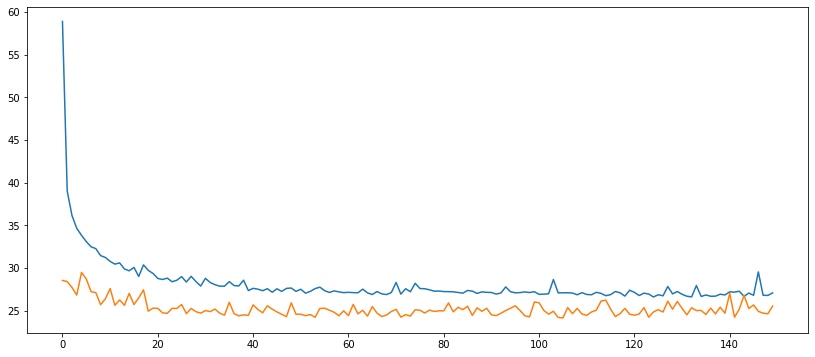

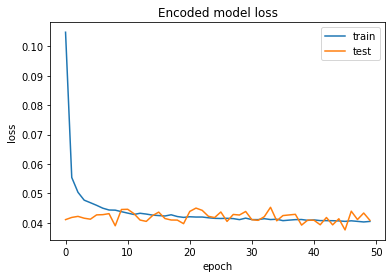

Overall accuracy of Convolutional Neural Network model: 0.9908359959271092


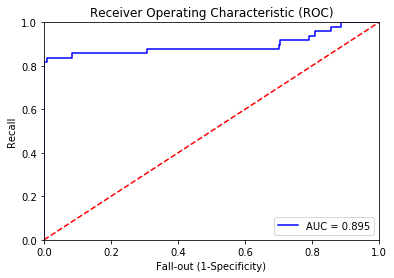

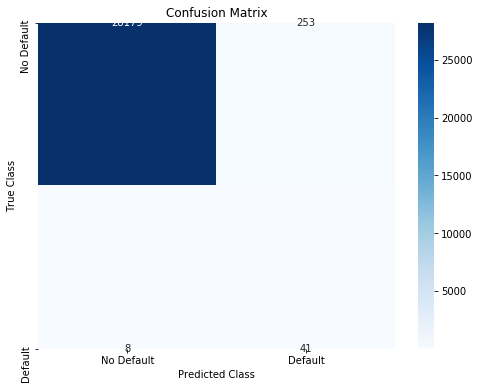

AUC(ROC): 0.9139181347834575
Precision: 0.13945578231292516
Recall: 0.8367346938775511
F1 score: 0.23906705539358597
False positives: 253
True positives: 41
False negatives: 8
True negatives: 28179
Fold #2
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sk

After OverSampling, the shape of train_X: (511766, 30)
After OverSampling, the shape of train_y: (511766,) 

After OverSampling, counts of label '1': 255883
After OverSampling, counts of label '0': 255883
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 27)           837         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_12 (BatchNo (None, 27)           108         dense_10[0][0]                   
_____________________________________________________________________________________

511766/511766 [==============================] - 28s 55us/step - loss: 18.6984 - rec_loss: 30.4216 - kl_loss: 4.9309 - val_loss: 14.0487 - val_rec_loss: 24.1762 - val_kl_loss: 3.0275
Epoch 17/150
511766/511766 [==============================] - 28s 55us/step - loss: 17.9207 - rec_loss: 29.0148 - kl_loss: 4.8474 - val_loss: 13.8964 - val_rec_loss: 24.0308 - val_kl_loss: 2.9198
Epoch 18/150
511766/511766 [==============================] - 28s 55us/step - loss: 17.7707 - rec_loss: 28.7421 - kl_loss: 4.8460 - val_loss: 14.2738 - val_rec_loss: 24.7639 - val_kl_loss: 2.9475
Epoch 19/150
511766/511766 [==============================] - 28s 55us/step - loss: 17.7256 - rec_loss: 28.6835 - kl_loss: 4.8370 - val_loss: 14.7913 - val_rec_loss: 25.8390 - val_kl_loss: 2.9256
Epoch 20/150
511766/511766 [==============================] - 28s 55us/step - loss: 17.5804 - rec_loss: 28.4105 - kl_loss: 4.8466 - val_loss: 14.2889 - val_rec_loss: 24.9060 - val_kl_loss: 2.8656
Epoch 21/150
511766/511766 [=====

Epoch 58/150
511766/511766 [==============================] - 28s 55us/step - loss: 16.8174 - rec_loss: 27.0228 - kl_loss: 4.9511 - val_loss: 13.6770 - val_rec_loss: 23.7448 - val_kl_loss: 2.8552
Epoch 59/150
511766/511766 [==============================] - 28s 55us/step - loss: 16.8206 - rec_loss: 27.0466 - kl_loss: 4.9461 - val_loss: 14.6359 - val_rec_loss: 25.5840 - val_kl_loss: 2.9148
Epoch 60/150
511766/511766 [==============================] - 28s 54us/step - loss: 16.7970 - rec_loss: 26.9878 - kl_loss: 4.9519 - val_loss: 14.0278 - val_rec_loss: 24.3017 - val_kl_loss: 3.0120
Epoch 61/150
511766/511766 [==============================] - 28s 55us/step - loss: 17.2102 - rec_loss: 27.7857 - kl_loss: 4.9720 - val_loss: 13.5117 - val_rec_loss: 23.4326 - val_kl_loss: 2.8376
Epoch 62/150
511766/511766 [==============================] - 28s 54us/step - loss: 16.6924 - rec_loss: 26.7901 - kl_loss: 4.9486 - val_loss: 14.0259 - val_rec_loss: 24.4335 - val_kl_loss: 2.8723
Epoch 63/150
511766/

Epoch 100/150
511766/511766 [==============================] - 28s 55us/step - loss: 16.7483 - rec_loss: 26.8426 - kl_loss: 5.0421 - val_loss: 13.5377 - val_rec_loss: 23.3909 - val_kl_loss: 2.9908
Epoch 101/150
511766/511766 [==============================] - 28s 55us/step - loss: 16.6339 - rec_loss: 26.6389 - kl_loss: 5.0205 - val_loss: 13.5946 - val_rec_loss: 23.3811 - val_kl_loss: 3.1136
Epoch 102/150
511766/511766 [==============================] - 28s 55us/step - loss: 16.6189 - rec_loss: 26.6053 - kl_loss: 5.0256 - val_loss: 13.7171 - val_rec_loss: 23.7779 - val_kl_loss: 2.9728
Epoch 103/150
511766/511766 [==============================] - 28s 55us/step - loss: 16.6042 - rec_loss: 26.5789 - kl_loss: 5.0154 - val_loss: 14.3965 - val_rec_loss: 25.0755 - val_kl_loss: 3.0338
Epoch 104/150
511766/511766 [==============================] - 28s 55us/step - loss: 16.6088 - rec_loss: 26.6059 - kl_loss: 5.0156 - val_loss: 13.4093 - val_rec_loss: 23.1092 - val_kl_loss: 3.0281
Epoch 105/150
5

511766/511766 [==============================] - 28s 55us/step - loss: 16.4839 - rec_loss: 26.3555 - kl_loss: 5.0219 - val_loss: 13.5798 - val_rec_loss: 23.4488 - val_kl_loss: 3.0257
Epoch 142/150
511766/511766 [==============================] - 28s 55us/step - loss: 16.5588 - rec_loss: 26.5012 - kl_loss: 5.0211 - val_loss: 13.3428 - val_rec_loss: 22.9567 - val_kl_loss: 3.0242
Epoch 143/150
511766/511766 [==============================] - 28s 55us/step - loss: 16.4358 - rec_loss: 26.2523 - kl_loss: 5.0257 - val_loss: 14.1338 - val_rec_loss: 24.5405 - val_kl_loss: 3.0433
Epoch 144/150
511766/511766 [==============================] - 28s 55us/step - loss: 16.3448 - rec_loss: 26.0867 - kl_loss: 5.0175 - val_loss: 13.6560 - val_rec_loss: 23.6094 - val_kl_loss: 3.0125
Epoch 145/150
511766/511766 [==============================] - 28s 55us/step - loss: 16.4551 - rec_loss: 26.2988 - kl_loss: 5.0241 - val_loss: 13.3597 - val_rec_loss: 23.0949 - val_kl_loss: 2.9505
Epoch 146/150
511766/511766 [

511766/511766 [==============================] - 102s 198us/step - loss: 0.0383 - accuracy: 0.9894 - val_loss: 0.0306 - val_accuracy: 0.9899
Epoch 42/50
511766/511766 [==============================] - 102s 198us/step - loss: 0.0382 - accuracy: 0.9896 - val_loss: 0.0343 - val_accuracy: 0.9886
Epoch 43/50
511766/511766 [==============================] - 102s 200us/step - loss: 0.0381 - accuracy: 0.9895 - val_loss: 0.0339 - val_accuracy: 0.9893
Epoch 44/50
511766/511766 [==============================] - 102s 199us/step - loss: 0.0383 - accuracy: 0.9895 - val_loss: 0.0282 - val_accuracy: 0.9905
Epoch 45/50
511766/511766 [==============================] - 102s 199us/step - loss: 0.0380 - accuracy: 0.9895 - val_loss: 0.0313 - val_accuracy: 0.9897
Epoch 46/50
511766/511766 [==============================] - 102s 199us/step - loss: 0.0381 - accuracy: 0.9895 - val_loss: 0.0347 - val_accuracy: 0.9889
Epoch 47/50
511766/511766 [==============================] - 102s 198us/step - loss: 0.0381 - 

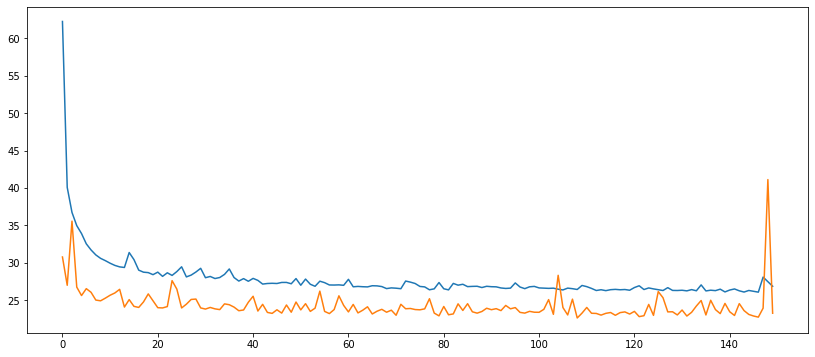

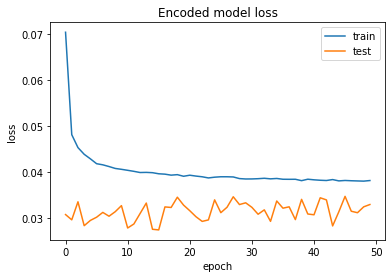

Overall accuracy of Convolutional Neural Network model: 0.9895368842386152


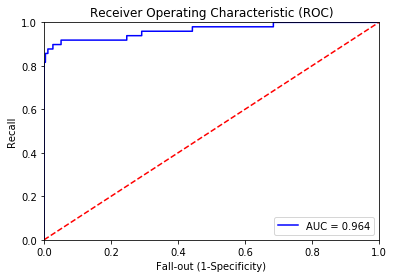

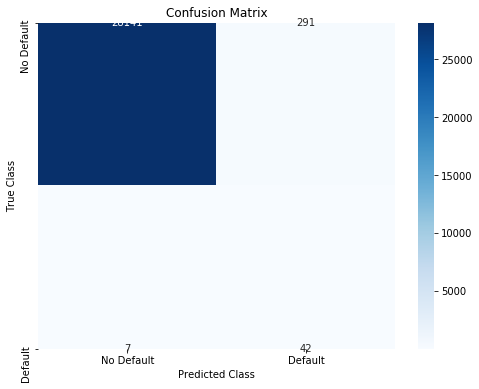

AUC(ROC): 0.9234539553018731
Precision: 0.12612612612612611
Recall: 0.8571428571428571
F1 score: 0.21989528795811517
False positives: 291
True positives: 42
False negatives: 7
True negatives: 28141
Fold #3
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sk

After OverSampling, the shape of train_X: (511766, 30)
After OverSampling, the shape of train_y: (511766,) 

After OverSampling, counts of label '1': 255883
After OverSampling, counts of label '0': 255883
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_19 (Dense)                (None, 27)           837         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_23 (BatchNo (None, 27)           108         dense_19[0][0]                   
_____________________________________________________________________________________

511766/511766 [==============================] - 28s 55us/step - loss: 17.8555 - rec_loss: 28.7575 - kl_loss: 5.0188 - val_loss: 15.4646 - val_rec_loss: 27.0006 - val_kl_loss: 3.0809
Epoch 17/150
511766/511766 [==============================] - 28s 55us/step - loss: 17.7762 - rec_loss: 28.6133 - kl_loss: 5.0208 - val_loss: 14.3642 - val_rec_loss: 24.6307 - val_kl_loss: 3.2568
Epoch 18/150
511766/511766 [==============================] - 28s 55us/step - loss: 17.6041 - rec_loss: 28.3176 - kl_loss: 5.0128 - val_loss: 14.0158 - val_rec_loss: 23.9531 - val_kl_loss: 3.2514
Epoch 19/150
511766/511766 [==============================] - 28s 55us/step - loss: 17.5909 - rec_loss: 28.3029 - kl_loss: 5.0140 - val_loss: 14.0422 - val_rec_loss: 24.0140 - val_kl_loss: 3.2609
Epoch 20/150
511766/511766 [==============================] - 28s 55us/step - loss: 17.4439 - rec_loss: 28.0483 - kl_loss: 5.0173 - val_loss: 13.9969 - val_rec_loss: 23.9825 - val_kl_loss: 3.2160
Epoch 21/150
511766/511766 [=====

Epoch 58/150
511766/511766 [==============================] - 28s 55us/step - loss: 16.4675 - rec_loss: 26.3273 - kl_loss: 5.0608 - val_loss: 13.3606 - val_rec_loss: 22.9587 - val_kl_loss: 3.0577
Epoch 59/150
511766/511766 [==============================] - 28s 55us/step - loss: 16.4307 - rec_loss: 26.2707 - kl_loss: 5.0484 - val_loss: 13.6635 - val_rec_loss: 23.4829 - val_kl_loss: 3.1487
Epoch 60/150
511766/511766 [==============================] - 28s 56us/step - loss: 16.5659 - rec_loss: 26.5182 - kl_loss: 5.0682 - val_loss: 13.9273 - val_rec_loss: 23.9989 - val_kl_loss: 3.1588
Epoch 61/150
511766/511766 [==============================] - 28s 56us/step - loss: 16.4192 - rec_loss: 26.2490 - kl_loss: 5.0491 - val_loss: 13.3541 - val_rec_loss: 22.8862 - val_kl_loss: 3.1336
Epoch 62/150
511766/511766 [==============================] - 28s 56us/step - loss: 16.3946 - rec_loss: 26.2019 - kl_loss: 5.0597 - val_loss: 13.4586 - val_rec_loss: 23.0637 - val_kl_loss: 3.1692
Epoch 63/150
511766/

Epoch 100/150
511766/511766 [==============================] - 28s 56us/step - loss: 17.3140 - rec_loss: 27.9285 - kl_loss: 5.1353 - val_loss: 13.7189 - val_rec_loss: 23.4603 - val_kl_loss: 3.2144
Epoch 101/150
511766/511766 [==============================] - 29s 56us/step - loss: 16.7520 - rec_loss: 26.8840 - kl_loss: 5.1159 - val_loss: 13.5705 - val_rec_loss: 23.2091 - val_kl_loss: 3.1865
Epoch 102/150
511766/511766 [==============================] - 29s 56us/step - loss: 16.7145 - rec_loss: 26.8235 - kl_loss: 5.1239 - val_loss: 14.5186 - val_rec_loss: 25.0687 - val_kl_loss: 3.2217
Epoch 103/150
511766/511766 [==============================] - 28s 55us/step - loss: 16.7552 - rec_loss: 26.9155 - kl_loss: 5.1233 - val_loss: 13.5700 - val_rec_loss: 23.1020 - val_kl_loss: 3.2818
Epoch 104/150
511766/511766 [==============================] - 29s 56us/step - loss: 16.7557 - rec_loss: 26.8969 - kl_loss: 5.1251 - val_loss: 13.7448 - val_rec_loss: 23.5970 - val_kl_loss: 3.1449
Epoch 105/150
5

511766/511766 [==============================] - 28s 55us/step - loss: 16.2516 - rec_loss: 26.0425 - kl_loss: 5.0948 - val_loss: 13.2723 - val_rec_loss: 22.6821 - val_kl_loss: 3.2167
Epoch 142/150
511766/511766 [==============================] - 28s 56us/step - loss: 16.1873 - rec_loss: 25.9381 - kl_loss: 5.0873 - val_loss: 13.5678 - val_rec_loss: 23.1594 - val_kl_loss: 3.3235
Epoch 143/150
511766/511766 [==============================] - 28s 56us/step - loss: 16.1704 - rec_loss: 25.9051 - kl_loss: 5.0913 - val_loss: 13.7118 - val_rec_loss: 23.6074 - val_kl_loss: 3.1802
Epoch 144/150
511766/511766 [==============================] - 28s 55us/step - loss: 16.5926 - rec_loss: 26.6949 - kl_loss: 5.1370 - val_loss: 14.3768 - val_rec_loss: 24.6274 - val_kl_loss: 3.4566
Epoch 145/150
511766/511766 [==============================] - 28s 56us/step - loss: 16.2411 - rec_loss: 26.0339 - kl_loss: 5.1000 - val_loss: 13.5398 - val_rec_loss: 23.0687 - val_kl_loss: 3.3694
Epoch 146/150
511766/511766 [

511766/511766 [==============================] - 104s 203us/step - loss: 0.0524 - accuracy: 0.9809 - val_loss: 0.0383 - val_accuracy: 0.9791
Epoch 42/50
511766/511766 [==============================] - 103s 202us/step - loss: 0.0523 - accuracy: 0.9810 - val_loss: 0.0422 - val_accuracy: 0.9786
Epoch 43/50
511766/511766 [==============================] - 104s 204us/step - loss: 0.0522 - accuracy: 0.9810 - val_loss: 0.0422 - val_accuracy: 0.9785
Epoch 44/50
511766/511766 [==============================] - 104s 203us/step - loss: 0.0521 - accuracy: 0.9809 - val_loss: 0.0452 - val_accuracy: 0.9775
Epoch 45/50
511766/511766 [==============================] - 103s 202us/step - loss: 0.0522 - accuracy: 0.9809 - val_loss: 0.0415 - val_accuracy: 0.9790
Epoch 46/50
511766/511766 [==============================] - 103s 202us/step - loss: 0.0522 - accuracy: 0.9809 - val_loss: 0.0405 - val_accuracy: 0.9788
Epoch 47/50
511766/511766 [==============================] - 103s 202us/step - loss: 0.0520 - 

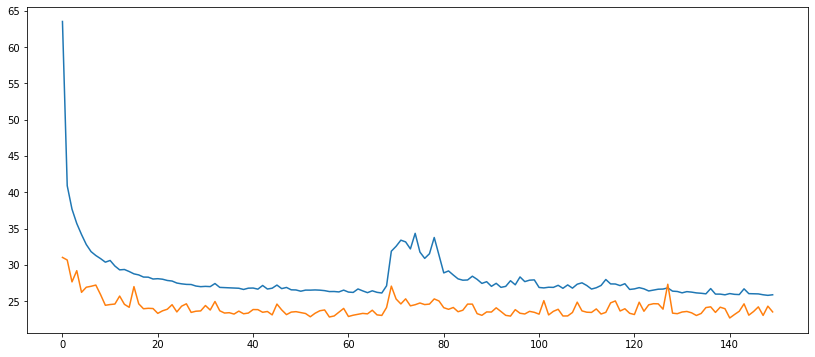

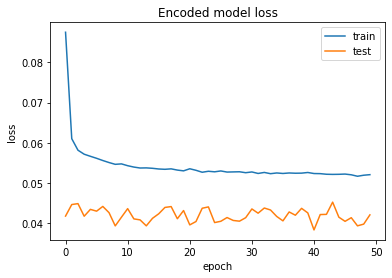

Overall accuracy of Convolutional Neural Network model: 0.9785471015764896


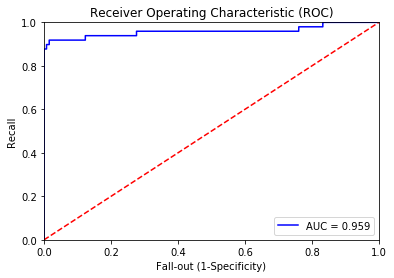

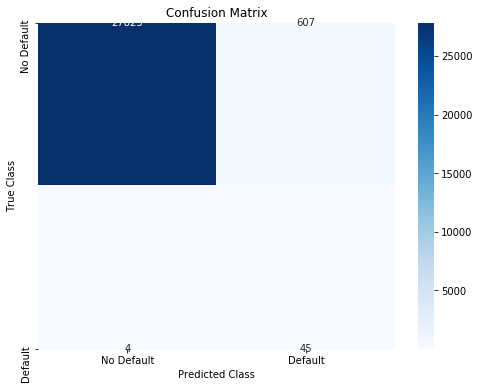

AUC(ROC): 0.9485090814603838
Precision: 0.06901840490797546
Recall: 0.9183673469387755
F1 score: 0.12838801711840228
False positives: 607
True positives: 45
False negatives: 4
True negatives: 27825
Fold #4
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sk

After OverSampling, the shape of train_X: (511766, 30)
After OverSampling, the shape of train_y: (511766,) 

After OverSampling, counts of label '1': 255883
After OverSampling, counts of label '0': 255883
Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_28 (Dense)                (None, 27)           837         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_34 (BatchNo (None, 27)           108         dense_28[0][0]                   
_____________________________________________________________________________________

511766/511766 [==============================] - 29s 56us/step - loss: 17.9235 - rec_loss: 29.4336 - kl_loss: 4.7698 - val_loss: 14.6318 - val_rec_loss: 25.7301 - val_kl_loss: 2.7976
Epoch 17/150
511766/511766 [==============================] - 29s 56us/step - loss: 17.7612 - rec_loss: 29.1482 - kl_loss: 4.7747 - val_loss: 14.7985 - val_rec_loss: 26.0046 - val_kl_loss: 2.8557
Epoch 18/150
511766/511766 [==============================] - 28s 56us/step - loss: 17.7922 - rec_loss: 29.2248 - kl_loss: 4.7803 - val_loss: 17.3515 - val_rec_loss: 31.0933 - val_kl_loss: 2.8870
Epoch 19/150
511766/511766 [==============================] - 28s 56us/step - loss: 17.6072 - rec_loss: 28.8566 - kl_loss: 4.7934 - val_loss: 14.4487 - val_rec_loss: 25.4026 - val_kl_loss: 2.7888
Epoch 20/150
511766/511766 [==============================] - 28s 56us/step - loss: 17.5139 - rec_loss: 28.6722 - kl_loss: 4.8042 - val_loss: 15.7805 - val_rec_loss: 27.8555 - val_kl_loss: 2.9903
Epoch 21/150
511766/511766 [=====

Epoch 58/150
511766/511766 [==============================] - 28s 55us/step - loss: 17.6856 - rec_loss: 28.9719 - kl_loss: 5.0337 - val_loss: 14.4806 - val_rec_loss: 25.2578 - val_kl_loss: 3.0783
Epoch 59/150
511766/511766 [==============================] - 29s 56us/step - loss: 16.9659 - rec_loss: 27.5664 - kl_loss: 4.9946 - val_loss: 13.8217 - val_rec_loss: 23.8664 - val_kl_loss: 3.1686
Epoch 60/150
511766/511766 [==============================] - 29s 56us/step - loss: 16.7002 - rec_loss: 27.0594 - kl_loss: 4.9901 - val_loss: 14.4793 - val_rec_loss: 25.2416 - val_kl_loss: 3.1046
Epoch 61/150
511766/511766 [==============================] - 29s 56us/step - loss: 16.8741 - rec_loss: 27.4082 - kl_loss: 4.9875 - val_loss: 14.0820 - val_rec_loss: 24.4103 - val_kl_loss: 3.1311
Epoch 62/150
511766/511766 [==============================] - 28s 55us/step - loss: 16.6488 - rec_loss: 26.9548 - kl_loss: 4.9855 - val_loss: 13.8348 - val_rec_loss: 24.0969 - val_kl_loss: 2.9551
Epoch 63/150
511766/

Epoch 100/150
511766/511766 [==============================] - 28s 56us/step - loss: 18.9864 - rec_loss: 31.5191 - kl_loss: 4.9903 - val_loss: 13.7446 - val_rec_loss: 23.6536 - val_kl_loss: 3.0241
Epoch 101/150
511766/511766 [==============================] - 29s 56us/step - loss: 18.7717 - rec_loss: 31.0722 - kl_loss: 4.9999 - val_loss: 13.6817 - val_rec_loss: 23.6985 - val_kl_loss: 2.8954
Epoch 102/150
511766/511766 [==============================] - 29s 56us/step - loss: 18.0856 - rec_loss: 29.7877 - kl_loss: 4.9716 - val_loss: 13.4921 - val_rec_loss: 23.1686 - val_kl_loss: 3.0975
Epoch 103/150
511766/511766 [==============================] - 29s 56us/step - loss: 18.1064 - rec_loss: 29.8749 - kl_loss: 4.9707 - val_loss: 13.6706 - val_rec_loss: 23.5104 - val_kl_loss: 3.1027
Epoch 104/150
511766/511766 [==============================] - 28s 56us/step - loss: 18.2432 - rec_loss: 30.1202 - kl_loss: 4.9916 - val_loss: 13.6320 - val_rec_loss: 23.4790 - val_kl_loss: 3.0532
Epoch 105/150
5

511766/511766 [==============================] - 29s 56us/step - loss: 17.9552 - rec_loss: 29.4891 - kl_loss: 5.0292 - val_loss: 13.9034 - val_rec_loss: 23.8926 - val_kl_loss: 3.1830
Epoch 142/150
511766/511766 [==============================] - 29s 56us/step - loss: 17.8645 - rec_loss: 29.3130 - kl_loss: 5.0298 - val_loss: 13.6313 - val_rec_loss: 23.4251 - val_kl_loss: 3.1112
Epoch 143/150
511766/511766 [==============================] - 28s 55us/step - loss: 17.8169 - rec_loss: 29.2259 - kl_loss: 5.0298 - val_loss: 13.6629 - val_rec_loss: 23.6452 - val_kl_loss: 2.9724
Epoch 144/150
511766/511766 [==============================] - 28s 55us/step - loss: 17.7702 - rec_loss: 29.1310 - kl_loss: 5.0327 - val_loss: 13.6920 - val_rec_loss: 23.7848 - val_kl_loss: 2.8809
Epoch 145/150
511766/511766 [==============================] - 29s 56us/step - loss: 17.7160 - rec_loss: 29.0187 - kl_loss: 5.0304 - val_loss: 13.3849 - val_rec_loss: 23.1273 - val_kl_loss: 2.9255
Epoch 146/150
511766/511766 [

Epoch 42/50
511766/511766 [==============================] - 97s 189us/step - loss: 0.0479 - accuracy: 0.9815 - val_loss: 0.0406 - val_accuracy: 0.9806
Epoch 43/50
511766/511766 [==============================] - 96s 188us/step - loss: 0.0480 - accuracy: 0.9815 - val_loss: 0.0478 - val_accuracy: 0.9774
Epoch 44/50
511766/511766 [==============================] - 96s 188us/step - loss: 0.0477 - accuracy: 0.9817 - val_loss: 0.0457 - val_accuracy: 0.9771
Epoch 45/50
511766/511766 [==============================] - 97s 189us/step - loss: 0.0476 - accuracy: 0.9816 - val_loss: 0.0445 - val_accuracy: 0.9788
Epoch 46/50
511766/511766 [==============================] - 94s 184us/step - loss: 0.0478 - accuracy: 0.9816 - val_loss: 0.0419 - val_accuracy: 0.9792
Epoch 47/50
511766/511766 [==============================] - 92s 180us/step - loss: 0.0477 - accuracy: 0.9816 - val_loss: 0.0483 - val_accuracy: 0.9784
Epoch 48/50
511766/511766 [==============================] - 93s 182us/step - loss: 0.04

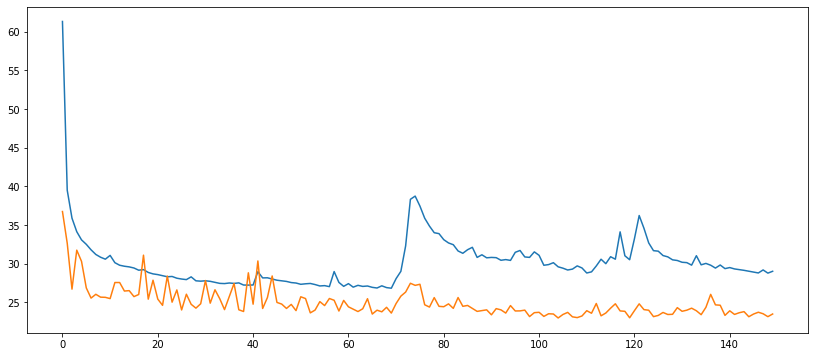

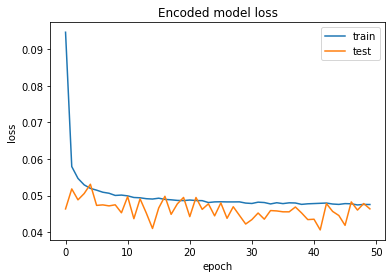

Overall accuracy of Convolutional Neural Network model: 0.9773884343948598


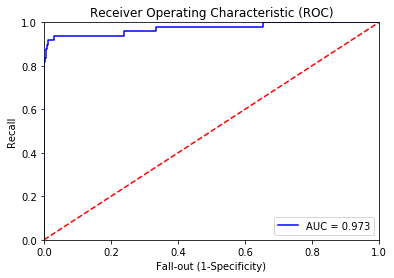

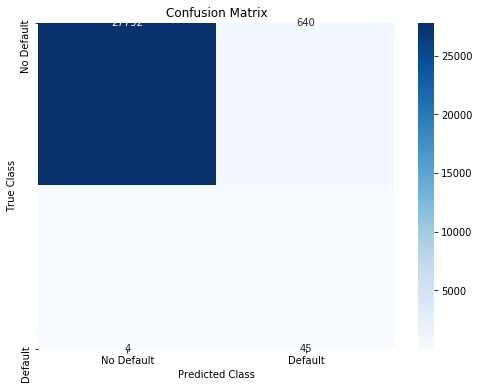

AUC(ROC): 0.9479287494401248
Precision: 0.06569343065693431
Recall: 0.9183673469387755
F1 score: 0.1226158038147139
False positives: 640
True positives: 45
False negatives: 4
True negatives: 27792
Fold #5
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sk

After OverSampling, the shape of train_X: (511766, 30)
After OverSampling, the shape of train_y: (511766,) 

After OverSampling, counts of label '1': 255883
After OverSampling, counts of label '0': 255883
Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_37 (Dense)                (None, 27)           837         input_9[0][0]                    
__________________________________________________________________________________________________
batch_normalization_45 (BatchNo (None, 27)           108         dense_37[0][0]                   
_____________________________________________________________________________________

511766/511766 [==============================] - 26s 52us/step - loss: 18.0633 - rec_loss: 29.5042 - kl_loss: 4.7385 - val_loss: 14.3844 - val_rec_loss: 25.1192 - val_kl_loss: 2.8082
Epoch 17/150
511766/511766 [==============================] - 26s 52us/step - loss: 17.9608 - rec_loss: 29.3034 - kl_loss: 4.7550 - val_loss: 15.2021 - val_rec_loss: 26.8925 - val_kl_loss: 2.6752
Epoch 18/150
511766/511766 [==============================] - 26s 52us/step - loss: 18.0210 - rec_loss: 29.4380 - kl_loss: 4.7622 - val_loss: 14.5098 - val_rec_loss: 25.4751 - val_kl_loss: 2.7375
Epoch 19/150
511766/511766 [==============================] - 26s 52us/step - loss: 17.7608 - rec_loss: 28.9460 - kl_loss: 4.7679 - val_loss: 14.6334 - val_rec_loss: 25.6735 - val_kl_loss: 2.8086
Epoch 20/150
511766/511766 [==============================] - 26s 52us/step - loss: 17.7204 - rec_loss: 28.8726 - kl_loss: 4.7724 - val_loss: 14.3244 - val_rec_loss: 25.1213 - val_kl_loss: 2.7639
Epoch 21/150
511766/511766 [=====

Epoch 58/150
511766/511766 [==============================] - 27s 52us/step - loss: 17.0787 - rec_loss: 27.5536 - kl_loss: 4.9212 - val_loss: 14.3813 - val_rec_loss: 25.1247 - val_kl_loss: 2.8730
Epoch 59/150
511766/511766 [==============================] - 27s 52us/step - loss: 16.8400 - rec_loss: 27.0983 - kl_loss: 4.9216 - val_loss: 14.2825 - val_rec_loss: 24.8573 - val_kl_loss: 2.9556
Epoch 60/150
511766/511766 [==============================] - 27s 52us/step - loss: 16.8548 - rec_loss: 27.1380 - kl_loss: 4.9227 - val_loss: 13.9489 - val_rec_loss: 24.3282 - val_kl_loss: 2.8442
Epoch 61/150
511766/511766 [==============================] - 27s 52us/step - loss: 16.8696 - rec_loss: 27.1655 - kl_loss: 4.9326 - val_loss: 14.0795 - val_rec_loss: 24.5281 - val_kl_loss: 2.8879
Epoch 62/150
511766/511766 [==============================] - 27s 52us/step - loss: 16.8818 - rec_loss: 27.2070 - kl_loss: 4.9194 - val_loss: 13.7273 - val_rec_loss: 23.8979 - val_kl_loss: 2.8384
Epoch 63/150
511766/

Epoch 100/150
511766/511766 [==============================] - 26s 51us/step - loss: 16.8676 - rec_loss: 27.1636 - kl_loss: 4.9561 - val_loss: 14.3985 - val_rec_loss: 25.0758 - val_kl_loss: 3.0108
Epoch 101/150
511766/511766 [==============================] - 26s 51us/step - loss: 16.5054 - rec_loss: 26.4571 - kl_loss: 4.9605 - val_loss: 14.1135 - val_rec_loss: 24.6055 - val_kl_loss: 2.9345
Epoch 102/150
511766/511766 [==============================] - 26s 51us/step - loss: 17.0295 - rec_loss: 27.5015 - kl_loss: 4.9638 - val_loss: 14.1329 - val_rec_loss: 24.5878 - val_kl_loss: 2.9808
Epoch 103/150
511766/511766 [==============================] - 26s 51us/step - loss: 17.1056 - rec_loss: 27.6225 - kl_loss: 4.9726 - val_loss: 14.0659 - val_rec_loss: 24.3509 - val_kl_loss: 3.0752
Epoch 104/150
511766/511766 [==============================] - 26s 51us/step - loss: 16.6190 - rec_loss: 26.6954 - kl_loss: 4.9599 - val_loss: 14.2056 - val_rec_loss: 24.8204 - val_kl_loss: 2.8991
Epoch 105/150
5

511766/511766 [==============================] - 26s 51us/step - loss: 16.4335 - rec_loss: 26.2797 - kl_loss: 5.0312 - val_loss: 13.6147 - val_rec_loss: 23.5710 - val_kl_loss: 2.9933
Epoch 142/150
511766/511766 [==============================] - 26s 50us/step - loss: 16.2911 - rec_loss: 26.0062 - kl_loss: 5.0228 - val_loss: 13.4318 - val_rec_loss: 23.1027 - val_kl_loss: 3.0653
Epoch 143/150
511766/511766 [==============================] - 26s 51us/step - loss: 16.2094 - rec_loss: 25.8473 - kl_loss: 5.0256 - val_loss: 14.1863 - val_rec_loss: 24.3216 - val_kl_loss: 3.3728
Epoch 144/150
511766/511766 [==============================] - 26s 51us/step - loss: 16.3059 - rec_loss: 26.0384 - kl_loss: 5.0361 - val_loss: 13.6635 - val_rec_loss: 23.5692 - val_kl_loss: 3.0948
Epoch 145/150
511766/511766 [==============================] - 26s 50us/step - loss: 16.3001 - rec_loss: 26.0157 - kl_loss: 5.0400 - val_loss: 13.5572 - val_rec_loss: 23.4889 - val_kl_loss: 2.9607
Epoch 146/150
511766/511766 [

Epoch 42/50
511766/511766 [==============================] - 98s 191us/step - loss: 0.0475 - accuracy: 0.9835 - val_loss: 0.0402 - val_accuracy: 0.9819
Epoch 43/50
511766/511766 [==============================] - 96s 188us/step - loss: 0.0474 - accuracy: 0.9838 - val_loss: 0.0401 - val_accuracy: 0.9824
Epoch 44/50
511766/511766 [==============================] - 96s 188us/step - loss: 0.0475 - accuracy: 0.9836 - val_loss: 0.0435 - val_accuracy: 0.9814
Epoch 45/50
511766/511766 [==============================] - 96s 188us/step - loss: 0.0474 - accuracy: 0.9836 - val_loss: 0.0444 - val_accuracy: 0.9818
Epoch 46/50
511766/511766 [==============================] - 97s 189us/step - loss: 0.0473 - accuracy: 0.9838 - val_loss: 0.0419 - val_accuracy: 0.9830
Epoch 47/50
511766/511766 [==============================] - 96s 188us/step - loss: 0.0471 - accuracy: 0.9837 - val_loss: 0.0427 - val_accuracy: 0.9821
Epoch 48/50
511766/511766 [==============================] - 95s 186us/step - loss: 0.04

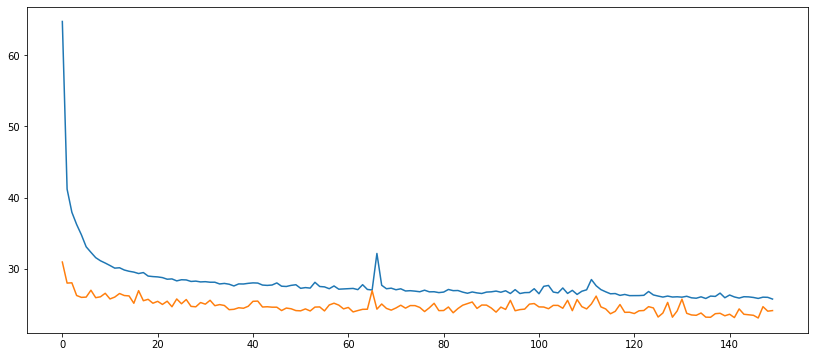

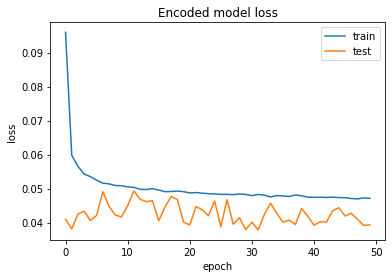

Overall accuracy of Convolutional Neural Network model: 0.9831115480495769


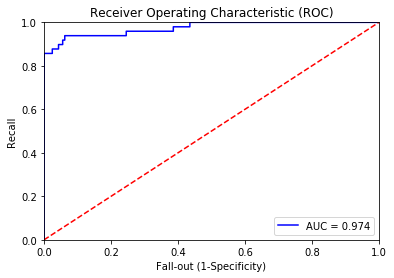

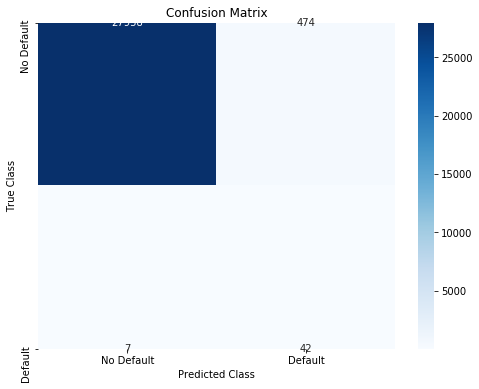

AUC(ROC): 0.9202357504622558
Precision: 0.08139534883720931
Recall: 0.8571428571428571
F1 score: 0.1486725663716814
False positives: 474
True positives: 42
False negatives: 7
True negatives: 27958
Fold #6
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sk

After OverSampling, the shape of train_X: (511768, 30)
After OverSampling, the shape of train_y: (511768,) 

After OverSampling, counts of label '1': 255884
After OverSampling, counts of label '0': 255884
Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           (None, 30)           0                                            
__________________________________________________________________________________________________
dense_46 (Dense)                (None, 27)           837         input_11[0][0]                   
__________________________________________________________________________________________________
batch_normalization_56 (BatchNo (None, 27)           108         dense_46[0][0]                   
____________________________________________________________________________________

511768/511768 [==============================] - 25s 48us/step - loss: 18.2993 - rec_loss: 29.9079 - kl_loss: 4.8322 - val_loss: 14.1938 - val_rec_loss: 24.7570 - val_kl_loss: 2.8089
Epoch 17/150
511768/511768 [==============================] - 25s 48us/step - loss: 18.2845 - rec_loss: 29.8934 - kl_loss: 4.8255 - val_loss: 14.8643 - val_rec_loss: 26.0564 - val_kl_loss: 2.8470
Epoch 18/150
511768/511768 [==============================] - 25s 48us/step - loss: 18.1535 - rec_loss: 29.6397 - kl_loss: 4.8346 - val_loss: 14.4057 - val_rec_loss: 25.1683 - val_kl_loss: 2.8176
Epoch 19/150
511768/511768 [==============================] - 25s 48us/step - loss: 17.9648 - rec_loss: 29.2500 - kl_loss: 4.8512 - val_loss: 14.8730 - val_rec_loss: 26.0277 - val_kl_loss: 2.9018
Epoch 20/150
511768/511768 [==============================] - 25s 48us/step - loss: 17.9026 - rec_loss: 29.1331 - kl_loss: 4.8545 - val_loss: 14.4893 - val_rec_loss: 25.3652 - val_kl_loss: 2.8259
Epoch 21/150
511768/511768 [=====

Epoch 58/150
511768/511768 [==============================] - 25s 48us/step - loss: 16.7664 - rec_loss: 26.6947 - kl_loss: 5.0395 - val_loss: 13.9276 - val_rec_loss: 23.9751 - val_kl_loss: 2.9421
Epoch 59/150
511768/511768 [==============================] - 25s 48us/step - loss: 16.7263 - rec_loss: 26.6182 - kl_loss: 5.0382 - val_loss: 13.4164 - val_rec_loss: 22.7705 - val_kl_loss: 3.1445
Epoch 60/150
511768/511768 [==============================] - 25s 48us/step - loss: 16.7283 - rec_loss: 26.6176 - kl_loss: 5.0460 - val_loss: 13.6613 - val_rec_loss: 23.4392 - val_kl_loss: 2.9801
Epoch 61/150
511768/511768 [==============================] - 25s 48us/step - loss: 16.7909 - rec_loss: 26.7444 - kl_loss: 5.0449 - val_loss: 13.8060 - val_rec_loss: 23.5756 - val_kl_loss: 3.0971
Epoch 62/150
511768/511768 [==============================] - 25s 48us/step - loss: 16.6808 - rec_loss: 26.5359 - kl_loss: 5.0275 - val_loss: 13.3930 - val_rec_loss: 22.8986 - val_kl_loss: 2.9669
Epoch 63/150
511768/

Epoch 100/150
511768/511768 [==============================] - 25s 48us/step - loss: 16.9435 - rec_loss: 26.8415 - kl_loss: 5.1078 - val_loss: 13.4197 - val_rec_loss: 22.7341 - val_kl_loss: 3.0482
Epoch 101/150
511768/511768 [==============================] - 25s 48us/step - loss: 16.8184 - rec_loss: 26.6077 - kl_loss: 5.1061 - val_loss: 13.3757 - val_rec_loss: 22.4867 - val_kl_loss: 3.1965
Epoch 102/150
511768/511768 [==============================] - 25s 48us/step - loss: 16.8925 - rec_loss: 26.7537 - kl_loss: 5.1022 - val_loss: 13.8763 - val_rec_loss: 23.4639 - val_kl_loss: 3.2260
Epoch 103/150
511768/511768 [==============================] - 25s 48us/step - loss: 16.7684 - rec_loss: 26.5248 - kl_loss: 5.1075 - val_loss: 13.6616 - val_rec_loss: 23.2448 - val_kl_loss: 3.0242
Epoch 104/150
511768/511768 [==============================] - 25s 48us/step - loss: 16.7619 - rec_loss: 26.4961 - kl_loss: 5.1085 - val_loss: 13.8857 - val_rec_loss: 23.6151 - val_kl_loss: 3.0868
Epoch 105/150
5

511768/511768 [==============================] - 25s 48us/step - loss: 16.6485 - rec_loss: 26.2747 - kl_loss: 5.1593 - val_loss: 13.5774 - val_rec_loss: 23.0912 - val_kl_loss: 3.0890
Epoch 142/150
511768/511768 [==============================] - 25s 48us/step - loss: 16.6304 - rec_loss: 26.2152 - kl_loss: 5.1776 - val_loss: 13.3411 - val_rec_loss: 22.5207 - val_kl_loss: 3.1743
Epoch 143/150
511768/511768 [==============================] - 25s 48us/step - loss: 16.4771 - rec_loss: 25.9329 - kl_loss: 5.1578 - val_loss: 13.6506 - val_rec_loss: 23.3010 - val_kl_loss: 3.0467
Epoch 144/150
511768/511768 [==============================] - 25s 48us/step - loss: 16.6085 - rec_loss: 26.2001 - kl_loss: 5.1564 - val_loss: 13.7538 - val_rec_loss: 23.3418 - val_kl_loss: 3.2140
Epoch 145/150
511768/511768 [==============================] - 25s 48us/step - loss: 16.5759 - rec_loss: 26.1345 - kl_loss: 5.1566 - val_loss: 13.5331 - val_rec_loss: 23.0716 - val_kl_loss: 3.0324
Epoch 146/150
511768/511768 [

511768/511768 [==============================] - 110s 214us/step - loss: 0.0468 - accuracy: 0.9861 - val_loss: 0.0457 - val_accuracy: 0.9863
Epoch 42/50
511768/511768 [==============================] - 107s 209us/step - loss: 0.0463 - accuracy: 0.9862 - val_loss: 0.0411 - val_accuracy: 0.9886
Epoch 43/50
511768/511768 [==============================] - 107s 209us/step - loss: 0.0467 - accuracy: 0.9861 - val_loss: 0.0421 - val_accuracy: 0.9876
Epoch 44/50
511768/511768 [==============================] - 108s 211us/step - loss: 0.0465 - accuracy: 0.9861 - val_loss: 0.0410 - val_accuracy: 0.9883
Epoch 45/50
511768/511768 [==============================] - 108s 211us/step - loss: 0.0463 - accuracy: 0.9862 - val_loss: 0.0443 - val_accuracy: 0.9873
Epoch 46/50
511768/511768 [==============================] - 106s 208us/step - loss: 0.0465 - accuracy: 0.9861 - val_loss: 0.0477 - val_accuracy: 0.9859
Epoch 47/50
511768/511768 [==============================] - 107s 209us/step - loss: 0.0465 - 

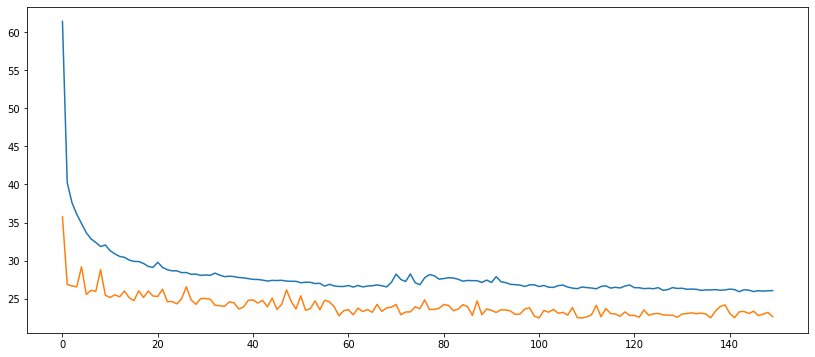

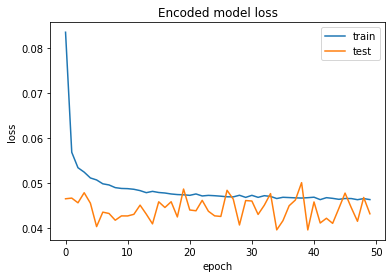

Overall accuracy of Convolutional Neural Network model: 0.9873951055089358


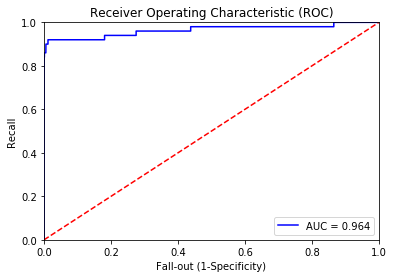

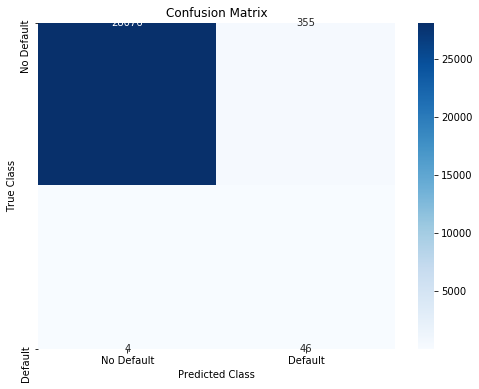

AUC(ROC): 0.953756814744469
Precision: 0.11471321695760599
Recall: 0.92
F1 score: 0.2039911308203991
False positives: 355
True positives: 46
False negatives: 4
True negatives: 28076
Fold #7
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sk

After OverSampling, the shape of train_X: (511768, 30)
After OverSampling, the shape of train_y: (511768,) 

After OverSampling, counts of label '1': 255884
After OverSampling, counts of label '0': 255884
Model: "model_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           (None, 30)           0                                            
__________________________________________________________________________________________________
dense_55 (Dense)                (None, 27)           837         input_13[0][0]                   
__________________________________________________________________________________________________
batch_normalization_67 (BatchNo (None, 27)           108         dense_55[0][0]                   
____________________________________________________________________________________

511768/511768 [==============================] - 30s 59us/step - loss: 17.9466 - rec_loss: 29.0619 - kl_loss: 4.8541 - val_loss: 14.2536 - val_rec_loss: 24.6727 - val_kl_loss: 2.9461
Epoch 17/150
511768/511768 [==============================] - 30s 59us/step - loss: 17.7664 - rec_loss: 28.7073 - kl_loss: 4.8763 - val_loss: 14.0706 - val_rec_loss: 24.3179 - val_kl_loss: 2.9421
Epoch 18/150
511768/511768 [==============================] - 29s 58us/step - loss: 17.6614 - rec_loss: 28.5111 - kl_loss: 4.8875 - val_loss: 14.1441 - val_rec_loss: 24.4910 - val_kl_loss: 2.9200
Epoch 19/150
511768/511768 [==============================] - 30s 59us/step - loss: 17.6303 - rec_loss: 28.4758 - kl_loss: 4.8999 - val_loss: 14.1197 - val_rec_loss: 24.4257 - val_kl_loss: 2.9465
Epoch 20/150
511768/511768 [==============================] - 30s 59us/step - loss: 17.4663 - rec_loss: 28.1756 - kl_loss: 4.9011 - val_loss: 13.9497 - val_rec_loss: 24.1910 - val_kl_loss: 2.8606
Epoch 21/150
511768/511768 [=====

Epoch 58/150
511768/511768 [==============================] - 30s 58us/step - loss: 16.5819 - rec_loss: 26.4939 - kl_loss: 4.9979 - val_loss: 14.0621 - val_rec_loss: 24.2542 - val_kl_loss: 3.1122
Epoch 59/150
511768/511768 [==============================] - 30s 59us/step - loss: 16.6627 - rec_loss: 26.6517 - kl_loss: 5.0073 - val_loss: 13.4241 - val_rec_loss: 23.0060 - val_kl_loss: 3.0697
Epoch 60/150
511768/511768 [==============================] - 29s 58us/step - loss: 16.7356 - rec_loss: 26.7932 - kl_loss: 4.9998 - val_loss: 13.6148 - val_rec_loss: 23.5184 - val_kl_loss: 2.9593
Epoch 61/150
511768/511768 [==============================] - 30s 58us/step - loss: 16.5515 - rec_loss: 26.4401 - kl_loss: 4.9989 - val_loss: 13.8255 - val_rec_loss: 23.9309 - val_kl_loss: 2.9597
Epoch 62/150
511768/511768 [==============================] - 29s 58us/step - loss: 16.5279 - rec_loss: 26.3943 - kl_loss: 5.0046 - val_loss: 13.7346 - val_rec_loss: 23.7112 - val_kl_loss: 3.0011
Epoch 63/150
511768/

Epoch 100/150
511768/511768 [==============================] - 30s 58us/step - loss: 16.7771 - rec_loss: 26.7792 - kl_loss: 5.1028 - val_loss: 14.0651 - val_rec_loss: 24.1847 - val_kl_loss: 3.1505
Epoch 101/150
511768/511768 [==============================] - 30s 58us/step - loss: 16.7042 - rec_loss: 26.6220 - kl_loss: 5.1148 - val_loss: 13.7006 - val_rec_loss: 23.5835 - val_kl_loss: 3.0376
Epoch 102/150
511768/511768 [==============================] - 30s 58us/step - loss: 16.6624 - rec_loss: 26.5616 - kl_loss: 5.1023 - val_loss: 13.8610 - val_rec_loss: 23.8184 - val_kl_loss: 3.0928
Epoch 103/150
511768/511768 [==============================] - 30s 58us/step - loss: 16.6598 - rec_loss: 26.5633 - kl_loss: 5.0885 - val_loss: 14.0142 - val_rec_loss: 24.2351 - val_kl_loss: 3.0102
Epoch 104/150
511768/511768 [==============================] - 30s 58us/step - loss: 16.6529 - rec_loss: 26.5281 - kl_loss: 5.1149 - val_loss: 13.7944 - val_rec_loss: 23.6250 - val_kl_loss: 3.1687
Epoch 105/150
5

511768/511768 [==============================] - 30s 58us/step - loss: 16.2807 - rec_loss: 25.8957 - kl_loss: 5.0572 - val_loss: 13.6659 - val_rec_loss: 23.3974 - val_kl_loss: 3.1499
Epoch 142/150
511768/511768 [==============================] - 30s 58us/step - loss: 16.3111 - rec_loss: 25.9472 - kl_loss: 5.0671 - val_loss: 14.1547 - val_rec_loss: 24.4726 - val_kl_loss: 3.0377
Epoch 143/150
511768/511768 [==============================] - 29s 57us/step - loss: 16.2851 - rec_loss: 25.9048 - kl_loss: 5.0542 - val_loss: 13.4537 - val_rec_loss: 23.2076 - val_kl_loss: 2.8950
Epoch 144/150
511768/511768 [==============================] - 30s 58us/step - loss: 16.3242 - rec_loss: 25.9889 - kl_loss: 5.0540 - val_loss: 13.5408 - val_rec_loss: 23.2309 - val_kl_loss: 3.0606
Epoch 145/150
511768/511768 [==============================] - 30s 58us/step - loss: 16.2674 - rec_loss: 25.8819 - kl_loss: 5.0510 - val_loss: 13.8802 - val_rec_loss: 23.9494 - val_kl_loss: 3.0178
Epoch 146/150
511768/511768 [

511768/511768 [==============================] - 109s 212us/step - loss: 0.0555 - accuracy: 0.9827 - val_loss: 0.0468 - val_accuracy: 0.9822
Epoch 42/50
511768/511768 [==============================] - 109s 213us/step - loss: 0.0553 - accuracy: 0.9828 - val_loss: 0.0472 - val_accuracy: 0.9827
Epoch 43/50
511768/511768 [==============================] - 109s 213us/step - loss: 0.0552 - accuracy: 0.9829 - val_loss: 0.0453 - val_accuracy: 0.9837
Epoch 44/50
511768/511768 [==============================] - 110s 215us/step - loss: 0.0554 - accuracy: 0.9827 - val_loss: 0.0455 - val_accuracy: 0.9824
Epoch 45/50
511768/511768 [==============================] - 105s 205us/step - loss: 0.0553 - accuracy: 0.9828 - val_loss: 0.0496 - val_accuracy: 0.9824
Epoch 46/50
511768/511768 [==============================] - 106s 207us/step - loss: 0.0553 - accuracy: 0.9829 - val_loss: 0.0477 - val_accuracy: 0.9820
Epoch 47/50
511768/511768 [==============================] - 108s 210us/step - loss: 0.0550 - 

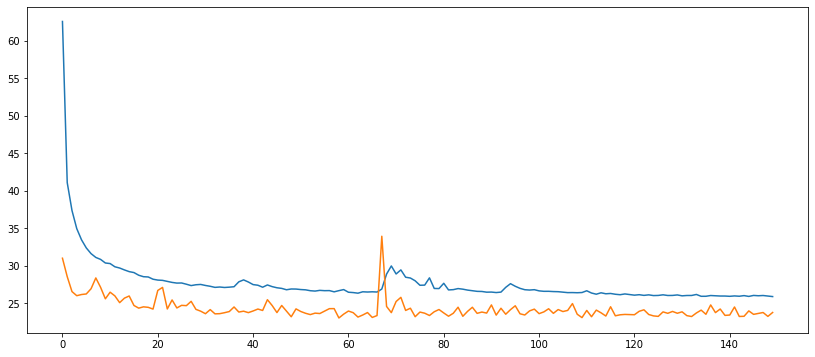

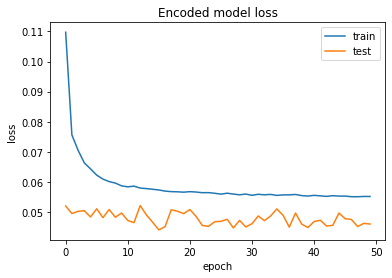

Overall accuracy of Convolutional Neural Network model: 0.982584881148836


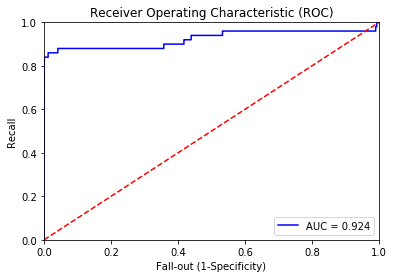

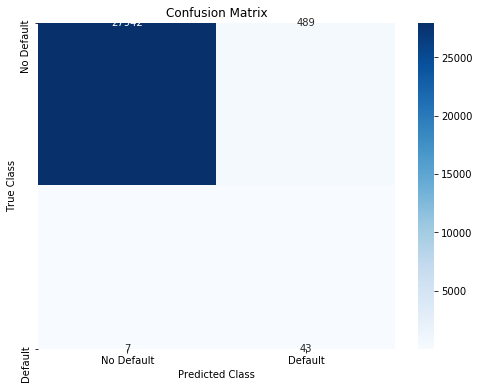

AUC(ROC): 0.9214002321409728
Precision: 0.08082706766917293
Recall: 0.86
F1 score: 0.14776632302405499
False positives: 489
True positives: 43
False negatives: 7
True negatives: 27942
Fold #8
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sk

After OverSampling, the shape of train_X: (511768, 30)
After OverSampling, the shape of train_y: (511768,) 

After OverSampling, counts of label '1': 255884
After OverSampling, counts of label '0': 255884
Model: "model_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           (None, 30)           0                                            
__________________________________________________________________________________________________
dense_64 (Dense)                (None, 27)           837         input_15[0][0]                   
__________________________________________________________________________________________________
batch_normalization_78 (BatchNo (None, 27)           108         dense_64[0][0]                   
____________________________________________________________________________________

511768/511768 [==============================] - 30s 58us/step - loss: 18.2716 - rec_loss: 29.8158 - kl_loss: 4.9044 - val_loss: 14.9081 - val_rec_loss: 26.0969 - val_kl_loss: 2.8924
Epoch 17/150
511768/511768 [==============================] - 30s 58us/step - loss: 18.1824 - rec_loss: 29.6649 - kl_loss: 4.9021 - val_loss: 14.2406 - val_rec_loss: 24.8778 - val_kl_loss: 2.8062
Epoch 18/150
511768/511768 [==============================] - 30s 58us/step - loss: 18.4114 - rec_loss: 30.1271 - kl_loss: 4.9017 - val_loss: 15.6257 - val_rec_loss: 27.5444 - val_kl_loss: 2.8972
Epoch 19/150
511768/511768 [==============================] - 30s 58us/step - loss: 18.0738 - rec_loss: 29.4732 - kl_loss: 4.8951 - val_loss: 15.0670 - val_rec_loss: 26.3891 - val_kl_loss: 2.9413
Epoch 20/150
511768/511768 [==============================] - 30s 58us/step - loss: 17.9269 - rec_loss: 29.1861 - kl_loss: 4.9092 - val_loss: 14.9568 - val_rec_loss: 26.1532 - val_kl_loss: 2.9751
Epoch 21/150
511768/511768 [=====

Epoch 58/150
511768/511768 [==============================] - 30s 58us/step - loss: 16.9077 - rec_loss: 27.2716 - kl_loss: 4.9509 - val_loss: 13.9991 - val_rec_loss: 24.3493 - val_kl_loss: 2.8398
Epoch 59/150
511768/511768 [==============================] - 29s 57us/step - loss: 16.9809 - rec_loss: 27.4075 - kl_loss: 4.9623 - val_loss: 14.5962 - val_rec_loss: 25.6922 - val_kl_loss: 2.7225
Epoch 60/150
511768/511768 [==============================] - 29s 58us/step - loss: 17.0727 - rec_loss: 27.6031 - kl_loss: 4.9530 - val_loss: 14.3843 - val_rec_loss: 25.2029 - val_kl_loss: 2.7830
Epoch 61/150
511768/511768 [==============================] - 30s 58us/step - loss: 16.9741 - rec_loss: 27.3910 - kl_loss: 4.9616 - val_loss: 14.5040 - val_rec_loss: 25.3381 - val_kl_loss: 2.8747
Epoch 62/150
511768/511768 [==============================] - 29s 57us/step - loss: 16.9652 - rec_loss: 27.3673 - kl_loss: 4.9639 - val_loss: 14.1810 - val_rec_loss: 24.7100 - val_kl_loss: 2.8530
Epoch 63/150
511768/

511768/511768 [==============================] - 29s 57us/step - loss: 17.0890 - rec_loss: 27.5389 - kl_loss: 4.9815 - val_loss: 14.0855 - val_rec_loss: 24.4645 - val_kl_loss: 2.8112
Epoch 100/150
511768/511768 [==============================] - 29s 58us/step - loss: 16.7542 - rec_loss: 26.8999 - kl_loss: 4.9763 - val_loss: 14.2421 - val_rec_loss: 24.8261 - val_kl_loss: 2.7949
Epoch 101/150
511768/511768 [==============================] - 30s 58us/step - loss: 16.7945 - rec_loss: 26.9726 - kl_loss: 4.9819 - val_loss: 14.2164 - val_rec_loss: 24.6903 - val_kl_loss: 2.8916
Epoch 102/150
511768/511768 [==============================] - 29s 57us/step - loss: 16.8396 - rec_loss: 27.0639 - kl_loss: 4.9829 - val_loss: 13.7939 - val_rec_loss: 24.1297 - val_kl_loss: 2.6000
Epoch 103/150
511768/511768 [==============================] - 29s 57us/step - loss: 16.6918 - rec_loss: 26.7799 - kl_loss: 4.9856 - val_loss: 14.5125 - val_rec_loss: 25.2768 - val_kl_loss: 2.8733
Epoch 104/150
511768/511768 [

Epoch 141/150
511768/511768 [==============================] - 29s 58us/step - loss: 16.4121 - rec_loss: 26.3111 - kl_loss: 4.9966 - val_loss: 14.1035 - val_rec_loss: 24.4836 - val_kl_loss: 2.8940
Epoch 142/150
511768/511768 [==============================] - 29s 56us/step - loss: 16.5467 - rec_loss: 26.5664 - kl_loss: 4.9876 - val_loss: 15.7505 - val_rec_loss: 27.7842 - val_kl_loss: 2.8578
Epoch 143/150
511768/511768 [==============================] - 30s 58us/step - loss: 16.4064 - rec_loss: 26.2949 - kl_loss: 4.9900 - val_loss: 14.0911 - val_rec_loss: 24.6720 - val_kl_loss: 2.6944
Epoch 144/150
511768/511768 [==============================] - 29s 57us/step - loss: 16.3637 - rec_loss: 26.2315 - kl_loss: 4.9861 - val_loss: 14.3565 - val_rec_loss: 25.0529 - val_kl_loss: 2.8220
Epoch 145/150
511768/511768 [==============================] - 29s 57us/step - loss: 16.3368 - rec_loss: 26.1749 - kl_loss: 4.9832 - val_loss: 14.4837 - val_rec_loss: 25.3288 - val_kl_loss: 2.8115
Epoch 146/150
5

511768/511768 [==============================] - 107s 209us/step - loss: 0.0493 - accuracy: 0.9840 - val_loss: 0.0383 - val_accuracy: 0.9919
Epoch 42/50
511768/511768 [==============================] - 106s 208us/step - loss: 0.0491 - accuracy: 0.9839 - val_loss: 0.0432 - val_accuracy: 0.9903
Epoch 43/50
511768/511768 [==============================] - 106s 207us/step - loss: 0.0488 - accuracy: 0.9841 - val_loss: 0.0401 - val_accuracy: 0.9912
Epoch 44/50
511768/511768 [==============================] - 107s 209us/step - loss: 0.0490 - accuracy: 0.9841 - val_loss: 0.0421 - val_accuracy: 0.9904
Epoch 45/50
511768/511768 [==============================] - 107s 209us/step - loss: 0.0489 - accuracy: 0.9840 - val_loss: 0.0377 - val_accuracy: 0.9919
Epoch 46/50
511768/511768 [==============================] - 106s 207us/step - loss: 0.0490 - accuracy: 0.9841 - val_loss: 0.0393 - val_accuracy: 0.9912
Epoch 47/50
511768/511768 [==============================] - 105s 205us/step - loss: 0.0491 - 

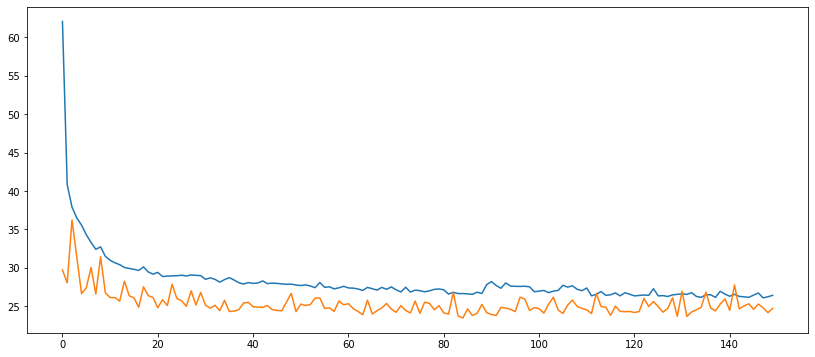

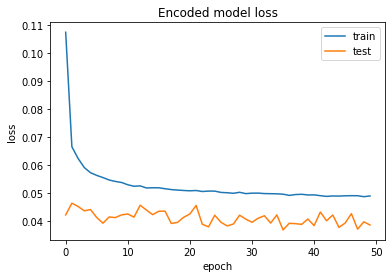

Overall accuracy of Convolutional Neural Network model: 0.991432584269663


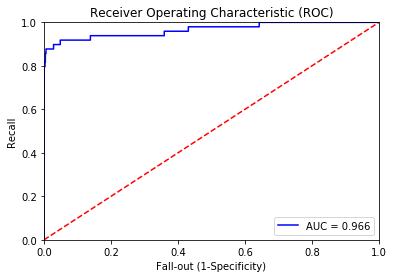

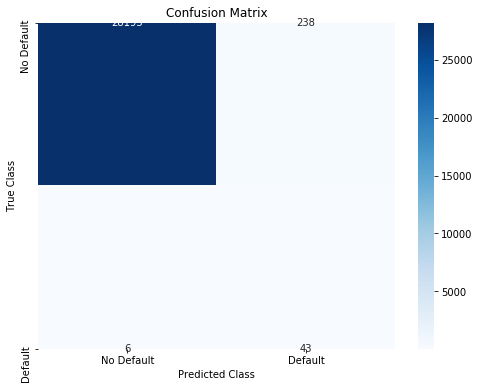

AUC(ROC): 0.934589938117275
Precision: 0.15302491103202848
Recall: 0.8775510204081632
F1 score: 0.2606060606060606
False positives: 238
True positives: 43
False negatives: 6
True negatives: 28193
Fold #9
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sk

After OverSampling, the shape of train_X: (511768, 30)
After OverSampling, the shape of train_y: (511768,) 

After OverSampling, counts of label '1': 255884
After OverSampling, counts of label '0': 255884
Model: "model_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           (None, 30)           0                                            
__________________________________________________________________________________________________
dense_73 (Dense)                (None, 27)           837         input_17[0][0]                   
__________________________________________________________________________________________________
batch_normalization_89 (BatchNo (None, 27)           108         dense_73[0][0]                   
____________________________________________________________________________________

511768/511768 [==============================] - 29s 57us/step - loss: 17.3205 - rec_loss: 28.1624 - kl_loss: 4.7594 - val_loss: 14.4415 - val_rec_loss: 25.4519 - val_kl_loss: 2.7118
Epoch 17/150
511768/511768 [==============================] - 29s 57us/step - loss: 17.1897 - rec_loss: 27.8970 - kl_loss: 4.7721 - val_loss: 13.5724 - val_rec_loss: 23.5607 - val_kl_loss: 2.8815
Epoch 18/150
511768/511768 [==============================] - 29s 57us/step - loss: 17.0910 - rec_loss: 27.7126 - kl_loss: 4.7756 - val_loss: 14.8152 - val_rec_loss: 26.0754 - val_kl_loss: 2.8539
Epoch 19/150
511768/511768 [==============================] - 29s 57us/step - loss: 16.9927 - rec_loss: 27.5468 - kl_loss: 4.7780 - val_loss: 14.2414 - val_rec_loss: 24.8291 - val_kl_loss: 2.9804
Epoch 20/150
511768/511768 [==============================] - 29s 57us/step - loss: 17.0895 - rec_loss: 27.7630 - kl_loss: 4.7763 - val_loss: 13.5414 - val_rec_loss: 23.4849 - val_kl_loss: 2.9332
Epoch 21/150
511768/511768 [=====

Epoch 58/150
511768/511768 [==============================] - 30s 58us/step - loss: 17.2202 - rec_loss: 27.7222 - kl_loss: 5.1041 - val_loss: 13.5022 - val_rec_loss: 23.2371 - val_kl_loss: 3.0837
Epoch 59/150
511768/511768 [==============================] - 29s 58us/step - loss: 16.3951 - rec_loss: 26.4632 - kl_loss: 4.8554 - val_loss: 13.4217 - val_rec_loss: 23.2287 - val_kl_loss: 2.9913
Epoch 60/150
511768/511768 [==============================] - 29s 57us/step - loss: 16.3497 - rec_loss: 26.4034 - kl_loss: 4.8532 - val_loss: 13.2328 - val_rec_loss: 22.8644 - val_kl_loss: 2.9912
Epoch 61/150
511768/511768 [==============================] - 30s 58us/step - loss: 16.2751 - rec_loss: 26.2784 - kl_loss: 4.8390 - val_loss: 13.8890 - val_rec_loss: 24.1215 - val_kl_loss: 3.0454
Epoch 62/150
511768/511768 [==============================] - 29s 58us/step - loss: 16.2457 - rec_loss: 26.2099 - kl_loss: 4.8484 - val_loss: 13.5518 - val_rec_loss: 23.3788 - val_kl_loss: 3.1099
Epoch 63/150
511768/

511768/511768 [==============================] - 29s 57us/step - loss: 16.6712 - rec_loss: 26.9916 - kl_loss: 4.9328 - val_loss: 14.2830 - val_rec_loss: 24.7377 - val_kl_loss: 3.1427
Epoch 100/150
511768/511768 [==============================] - 29s 57us/step - loss: 16.6880 - rec_loss: 27.0246 - kl_loss: 4.9250 - val_loss: 13.7168 - val_rec_loss: 23.6140 - val_kl_loss: 3.1581
Epoch 101/150
511768/511768 [==============================] - 30s 58us/step - loss: 16.5231 - rec_loss: 26.7185 - kl_loss: 4.9182 - val_loss: 13.1732 - val_rec_loss: 22.6651 - val_kl_loss: 3.0367
Epoch 102/150
511768/511768 [==============================] - 30s 59us/step - loss: 16.3754 - rec_loss: 26.4377 - kl_loss: 4.9151 - val_loss: 13.5554 - val_rec_loss: 23.2927 - val_kl_loss: 3.1713
Epoch 103/150
511768/511768 [==============================] - 29s 58us/step - loss: 16.5554 - rec_loss: 26.8007 - kl_loss: 4.9040 - val_loss: 13.2916 - val_rec_loss: 22.8414 - val_kl_loss: 3.0886
Epoch 104/150
511768/511768 [

511768/511768 [==============================] - 30s 58us/step - loss: 16.0978 - rec_loss: 25.8676 - kl_loss: 4.9456 - val_loss: 13.3663 - val_rec_loss: 22.8382 - val_kl_loss: 3.2734
Epoch 141/150
511768/511768 [==============================] - 29s 58us/step - loss: 16.0692 - rec_loss: 25.8322 - kl_loss: 4.9367 - val_loss: 13.5830 - val_rec_loss: 23.4803 - val_kl_loss: 3.0764
Epoch 142/150
511768/511768 [==============================] - 30s 58us/step - loss: 16.1009 - rec_loss: 25.8955 - kl_loss: 4.9440 - val_loss: 13.1773 - val_rec_loss: 22.6877 - val_kl_loss: 3.0657
Epoch 143/150
511768/511768 [==============================] - 30s 58us/step - loss: 16.1857 - rec_loss: 26.0571 - kl_loss: 4.9416 - val_loss: 13.8178 - val_rec_loss: 23.8467 - val_kl_loss: 3.1774
Epoch 144/150
511768/511768 [==============================] - 29s 57us/step - loss: 16.0988 - rec_loss: 25.8904 - kl_loss: 4.9445 - val_loss: 13.8678 - val_rec_loss: 23.7918 - val_kl_loss: 3.3161
Epoch 145/150
511768/511768 [

511768/511768 [==============================] - 109s 213us/step - loss: 0.0450 - accuracy: 0.9856 - val_loss: 0.0453 - val_accuracy: 0.9896
Epoch 41/50
511768/511768 [==============================] - 109s 214us/step - loss: 0.0451 - accuracy: 0.9855 - val_loss: 0.0456 - val_accuracy: 0.9894
Epoch 42/50
511768/511768 [==============================] - 109s 213us/step - loss: 0.0448 - accuracy: 0.9856 - val_loss: 0.0498 - val_accuracy: 0.9888
Epoch 43/50
511768/511768 [==============================] - 109s 213us/step - loss: 0.0451 - accuracy: 0.9855 - val_loss: 0.0491 - val_accuracy: 0.9879
Epoch 44/50
511768/511768 [==============================] - 110s 214us/step - loss: 0.0449 - accuracy: 0.9855 - val_loss: 0.0492 - val_accuracy: 0.9878
Epoch 45/50
511768/511768 [==============================] - 108s 211us/step - loss: 0.0448 - accuracy: 0.9855 - val_loss: 0.0438 - val_accuracy: 0.9896
Epoch 46/50
511768/511768 [==============================] - 108s 211us/step - loss: 0.0448 - 

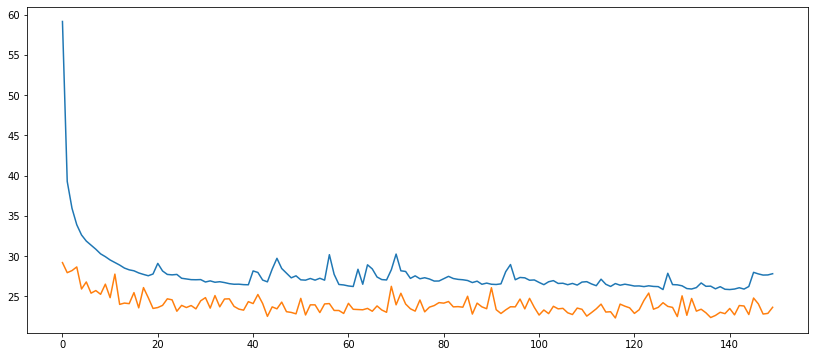

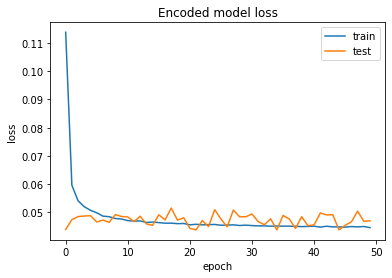

Overall accuracy of Convolutional Neural Network model: 0.9890800561797752


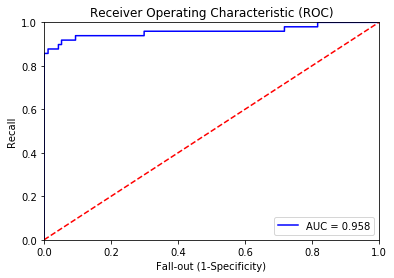

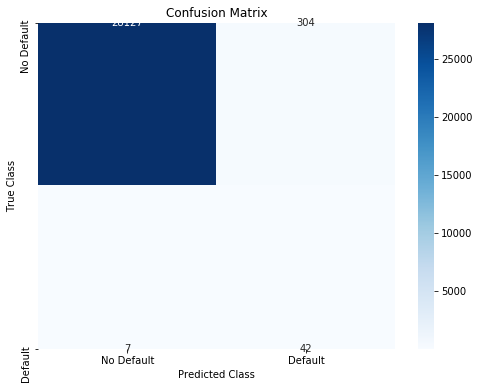

AUC(ROC): 0.9232251516202133
Precision: 0.12138728323699421
Recall: 0.8571428571428571
F1 score: 0.21265822784810126
False positives: 304
True positives: 42
False negatives: 7
True negatives: 28127
Fold #10
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sk

After OverSampling, the shape of train_X: (511768, 30)
After OverSampling, the shape of train_y: (511768,) 

After OverSampling, counts of label '1': 255884
After OverSampling, counts of label '0': 255884
Model: "model_19"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_19 (InputLayer)           (None, 30)           0                                            
__________________________________________________________________________________________________
dense_82 (Dense)                (None, 27)           837         input_19[0][0]                   
__________________________________________________________________________________________________
batch_normalization_100 (BatchN (None, 27)           108         dense_82[0][0]                   
____________________________________________________________________________________

511768/511768 [==============================] - 30s 59us/step - loss: 17.8887 - rec_loss: 29.2266 - kl_loss: 4.8018 - val_loss: 14.2661 - val_rec_loss: 24.9312 - val_kl_loss: 2.8656
Epoch 17/150
511768/511768 [==============================] - 30s 59us/step - loss: 17.8310 - rec_loss: 29.1107 - kl_loss: 4.8175 - val_loss: 13.9495 - val_rec_loss: 24.3519 - val_kl_loss: 2.8294
Epoch 18/150
511768/511768 [==============================] - 30s 59us/step - loss: 17.7780 - rec_loss: 29.0176 - kl_loss: 4.8222 - val_loss: 14.6081 - val_rec_loss: 25.5554 - val_kl_loss: 2.9514
Epoch 19/150
511768/511768 [==============================] - 30s 59us/step - loss: 17.6766 - rec_loss: 28.8144 - kl_loss: 4.8311 - val_loss: 14.3331 - val_rec_loss: 25.1242 - val_kl_loss: 2.8456
Epoch 20/150
511768/511768 [==============================] - 31s 60us/step - loss: 17.6771 - rec_loss: 28.8409 - kl_loss: 4.8254 - val_loss: 14.2641 - val_rec_loss: 25.0150 - val_kl_loss: 2.8040
Epoch 21/150
511768/511768 [=====

511768/511768 [==============================] - 30s 58us/step - loss: 16.4523 - rec_loss: 26.4456 - kl_loss: 4.9286 - val_loss: 13.3155 - val_rec_loss: 22.9107 - val_kl_loss: 3.0275
Epoch 58/150
511768/511768 [==============================] - 31s 60us/step - loss: 16.4898 - rec_loss: 26.5232 - kl_loss: 4.9301 - val_loss: 13.2942 - val_rec_loss: 22.8190 - val_kl_loss: 3.0855
Epoch 59/150
511768/511768 [==============================] - 30s 59us/step - loss: 16.4664 - rec_loss: 26.4765 - kl_loss: 4.9372 - val_loss: 13.4572 - val_rec_loss: 23.2593 - val_kl_loss: 2.9901
Epoch 60/150
511768/511768 [==============================] - 30s 59us/step - loss: 16.4340 - rec_loss: 26.4281 - kl_loss: 4.9319 - val_loss: 14.1643 - val_rec_loss: 24.6337 - val_kl_loss: 3.0302
Epoch 61/150
511768/511768 [==============================] - 30s 59us/step - loss: 16.4352 - rec_loss: 26.4433 - kl_loss: 4.9334 - val_loss: 13.2114 - val_rec_loss: 22.7957 - val_kl_loss: 2.9654
Epoch 62/150
511768/511768 [=====

Epoch 99/150
511768/511768 [==============================] - 30s 59us/step - loss: 16.2055 - rec_loss: 26.0387 - kl_loss: 4.9784 - val_loss: 13.4731 - val_rec_loss: 23.2794 - val_kl_loss: 2.9960
Epoch 100/150
511768/511768 [==============================] - 30s 59us/step - loss: 16.1521 - rec_loss: 25.9468 - kl_loss: 4.9628 - val_loss: 13.5071 - val_rec_loss: 23.3003 - val_kl_loss: 3.0518
Epoch 101/150
511768/511768 [==============================] - 30s 58us/step - loss: 16.1512 - rec_loss: 25.9177 - kl_loss: 4.9856 - val_loss: 13.7525 - val_rec_loss: 23.8701 - val_kl_loss: 2.9455
Epoch 102/150
511768/511768 [==============================] - 30s 59us/step - loss: 16.1628 - rec_loss: 25.9448 - kl_loss: 4.9831 - val_loss: 13.5751 - val_rec_loss: 23.3581 - val_kl_loss: 3.1171
Epoch 103/150
511768/511768 [==============================] - 31s 60us/step - loss: 16.1389 - rec_loss: 25.8980 - kl_loss: 4.9950 - val_loss: 14.3061 - val_rec_loss: 24.7581 - val_kl_loss: 3.1681
Epoch 104/150
51

511768/511768 [==============================] - 29s 57us/step - loss: 16.1387 - rec_loss: 25.8559 - kl_loss: 5.0245 - val_loss: 14.1746 - val_rec_loss: 24.5981 - val_kl_loss: 3.0771
Epoch 141/150
511768/511768 [==============================] - 30s 58us/step - loss: 16.1889 - rec_loss: 25.9830 - kl_loss: 5.0231 - val_loss: 14.1316 - val_rec_loss: 24.6202 - val_kl_loss: 2.9919
Epoch 142/150
511768/511768 [==============================] - 30s 58us/step - loss: 16.1446 - rec_loss: 25.9005 - kl_loss: 5.0251 - val_loss: 13.7368 - val_rec_loss: 23.6789 - val_kl_loss: 3.1354
Epoch 143/150
511768/511768 [==============================] - 30s 58us/step - loss: 16.1004 - rec_loss: 25.8128 - kl_loss: 5.0193 - val_loss: 13.7646 - val_rec_loss: 23.6722 - val_kl_loss: 3.1882
Epoch 144/150
511768/511768 [==============================] - 30s 58us/step - loss: 16.1740 - rec_loss: 25.9421 - kl_loss: 5.0289 - val_loss: 13.6758 - val_rec_loss: 23.5994 - val_kl_loss: 3.0879
Epoch 145/150
511768/511768 [

511768/511768 [==============================] - 109s 213us/step - loss: 0.0345 - accuracy: 0.9880 - val_loss: 0.0444 - val_accuracy: 0.9840
Epoch 41/50
511768/511768 [==============================] - 109s 213us/step - loss: 0.0343 - accuracy: 0.9881 - val_loss: 0.0377 - val_accuracy: 0.9870
Epoch 42/50
511768/511768 [==============================] - 108s 212us/step - loss: 0.0341 - accuracy: 0.9881 - val_loss: 0.0389 - val_accuracy: 0.9856
Epoch 43/50
511768/511768 [==============================] - 109s 212us/step - loss: 0.0340 - accuracy: 0.9881 - val_loss: 0.0406 - val_accuracy: 0.9853
Epoch 44/50
511768/511768 [==============================] - 108s 212us/step - loss: 0.0342 - accuracy: 0.9881 - val_loss: 0.0420 - val_accuracy: 0.9850
Epoch 45/50
511768/511768 [==============================] - 109s 213us/step - loss: 0.0341 - accuracy: 0.9880 - val_loss: 0.0398 - val_accuracy: 0.9851
Epoch 46/50
511768/511768 [==============================] - 109s 213us/step - loss: 0.0340 - 

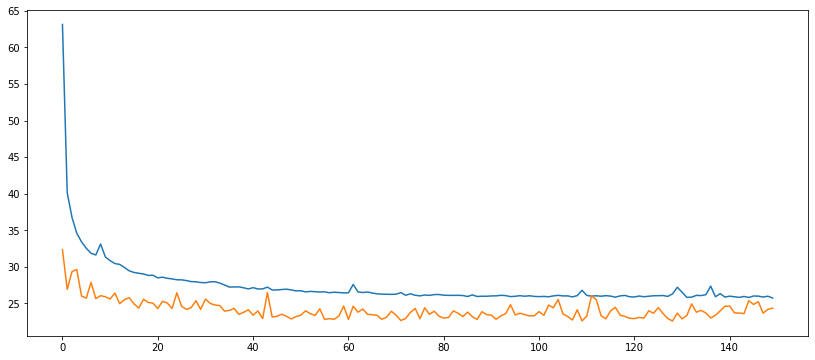

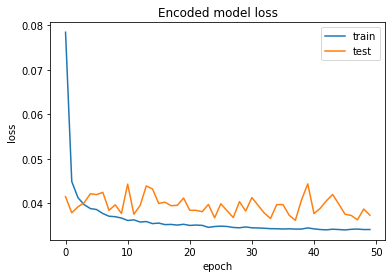

Overall accuracy of Convolutional Neural Network model: 0.9863412921348315


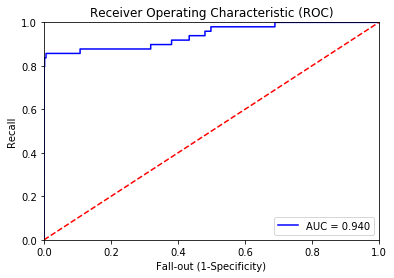

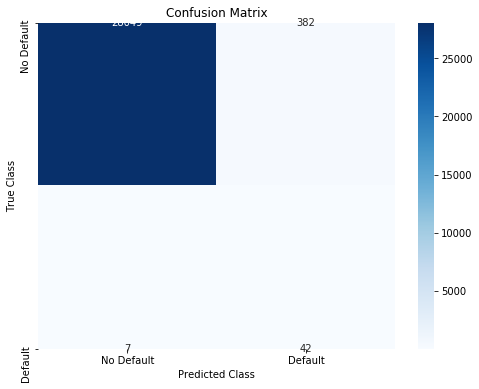

AUC(ROC): 0.9218534095077305
Precision: 0.09905660377358491
Recall: 0.8571428571428571
F1 score: 0.17758985200845664
False positives: 382
True positives: 42
False negatives: 7
True negatives: 28049


In [6]:
encoding_dim_1 = 27
encoding_dim_2 = 24
encoding_dim_3 = 21
#encoding_dim_4 = 20
#encoding_dim_5 = 18
hidden_dim = 15 #size of the hidden layer in encoder and decoder
latent_dim = 2 #number of latent variables to learn
learning_rate = 1e-3

#Cross_Validate

kf = StratifiedKFold(10, shuffle = True, random_state=42) # Use for Kfold Validation

tn_summary=[]
fp_summary=[]
fn_summary=[]
tp_summary=[]

def Average(lst): 
    return sum(lst) / len(lst)
    

fold = 0

for train, test in kf.split(X,y):
    fold +=1
    print(f"Fold #{fold}")
    
    
    
    x_train = X[train]
    y_train = y[train]
    x_test = X[test]
    y_test = y[test]

    
    scaler = preprocessing.StandardScaler()

    x_train, x_test = scaler.fit_transform(x_train), scaler.fit_transform(x_test) 
    
    
    print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
    print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

    sm = SVMSMOTE(random_state=2)
    X_res_train, y_train_res = sm.fit_sample(x_train, y_train.ravel())

    print('After OverSampling, the shape of train_X: {}'.format(X_res_train.shape))
    print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

    print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
    print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
    
    

    input_dim = X_res_train.shape[1]
    x = input_dim

    input_layer = Input(shape=(input_dim,))

    encoder = Dense(encoding_dim_1, activation='tanh',activity_regularizer=regularizers.l1(learning_rate))(input_layer)
    encoder = BatchNormalization()(encoder)

    encoder = Dense(encoding_dim_2, activation='tanh')(encoder)
    encoder = BatchNormalization()(encoder)

    encoder = Dense(encoding_dim_3, activation='tanh')(encoder)
    encoder = BatchNormalization()(encoder)

    #encoder = Dense (encoding_dim_4, activation = 'tanh')(encoder)
    #encoder = BatchNormalization()(encoder)

    #encoder = Dense (encoding_dim_5, activation = 'tanh')(encoder)
    #encoder = BatchNormalization()(encoder)

    encoder = Dense(hidden_dim, activation='tanh' , name='encoder_hidden')(encoder)
    encoder = BatchNormalization()(encoder)

    z_mean = Dense(latent_dim, name='z_mean')(encoder)
    z_log_var = Dense(latent_dim, name='z_log_var')(encoder)
    
    def sampling(args):
        z_mean, z_log_var = args
        epsilon = K.random_normal(shape=K.shape(z_mean), mean=0., stddev=1.)
        return z_mean + K.exp(z_log_var / 2) * epsilon

    z = Lambda(sampling, name='z_sampled')([z_mean, z_log_var])
    t = BatchNormalization()(z)

    decoder1 = Dense(hidden_dim, activation='tanh')(t)
    decoder1 = BatchNormalization()(decoder1) 

    #decoder = Dense(encoding_dim_5, activation = 'tanh')(decoder)
    #decoder = BatchNormalization()(decoder)

    #decoder = Dense(encoding_dim_4, activation = 'tanh')(decoder)
    #decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_3, activation='tanh')(decoder1)
    decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_2, activation='tanh')(decoder)
    decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_1, activation='tanh')(decoder)
    decoder = BatchNormalization()(decoder)


    decoded_mean = Dense(input_dim, activation=None, name='decoded_mean')(decoder)


    vae = Model(inputs=input_layer, outputs=decoded_mean)
    
    def rec_loss(y_true, y_pred):
        return K.sum(K.square(y_true - y_pred), axis=-1)

    def kl_loss(y_true, y_pred):
        return - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)

    def vae_loss(x, decoded_mean):
        rec_loss = K.sum(K.square(x - decoded_mean), axis=-1)
        kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
        return K.mean((rec_loss + kl_loss) / 2)

    vae.compile(optimizer=RMSprop(lr=learning_rate), loss=vae_loss, metrics=[rec_loss, kl_loss])
    vae.summary()
    
    n_epochs = 150
    batch_size = 128

#early_stopping = EarlyStopping(monitor='loss', patience=10, min_delta=1e-5) #stop training if loss does not decrease with at least 0.00001
#reduce_lr = ReduceLROnPlateau(monitor='loss', patience=5, min_delta=1e-5, factor=0.2) #reduce learning rate (divide it by 5 = multiply it by 0.2) if loss does not decrease with at least 0.00001

#callbacks = [reduce_lr]

#collect training data in history object
    history = vae.fit(X_res_train, X_res_train, 
                  validation_data=(x_test, x_test),
                  batch_size=batch_size,
                  shuffle = True,
                  epochs=n_epochs,
                  )
    
    
    fig = plt.figure(figsize=(14, 6))
    ax = fig.gca()
    ax.plot(history.history['rec_loss']);
    ax.plot(history.history['val_rec_loss']);
    
    
    
    # Create a separate model (encoder) in order to make encodings (first part of the autoencoder model)
    encoder_model = Model(input_layer, decoder1)
    # Create a placeholder for an encoded input
    encoded_input = Input(shape=(hidden_dim,))
    
    
    #Encode data set from above using the encoder
    encoded_train_x = encoder_model.predict(X_res_train)
    encoded_test_x = encoder_model.predict(x_test)
    #Reshape data for the CNN model
    encoded_train_x = encoded_train_x.reshape(encoded_train_x.shape[0],encoded_train_x.shape[1], 1)
    encoded_test_x = encoded_test_x.reshape(encoded_test_x.shape[0], encoded_test_x.shape[1], 1)
    encoded_train_x.shape
    
    #--------------------------------Build new model using encoded data--------------------------

    model = Sequential()
    model.add(Conv1D(32, 2, activation='relu', input_shape = encoded_train_x[1].shape))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.2))

    model.add(Conv1D(64, 2, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy',metrics=['accuracy'])
    history = model.fit(encoded_train_x, y_train_res, epochs=50,validation_data=(encoded_test_x, y_test), verbose=1)

    # Summarize history for loss
    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Encoded model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
    
    

        #---------------------------------Predictions and visuallizations-----------------------#Predict on test set
    predictions_CNN_prob = model.predict(encoded_test_x)
    predictions_CNN_prob = predictions_CNN_prob[:,0]
    predictions_CNN_01 = np.where(predictions_CNN_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output
    #Print accuracy
    acc_CNN = accuracy_score(y_test, predictions_CNN_01)
    print('Overall accuracy of Convolutional Neural Network model:', acc_CNN)
    #Print Area Under Curve
    false_positive_rate, recall, thresholds = roc_curve(y_test,predictions_CNN_prob)
    roc_auc = auc(false_positive_rate, recall)
    plt.figure()
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.ylabel('Recall')
    plt.xlabel('Fall-out (1-Specificity)')
    plt.show()
    #Print Confusion Matrix
    cm = confusion_matrix(y_test, predictions_CNN_01)
    labels = ['No Default', 'Default']
    plt.figure(figsize=(8,6))
    sns.heatmap(cm,xticklabels=labels, yticklabels=labels, annot=True, fmt='d',cmap="Blues", vmin = 0.2);
    plt.title('Confusion Matrix')
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.show()


    print("AUC(ROC): " + str(metrics.roc_auc_score(y_test, predictions_CNN_01)))
    print("Precision: " + str(metrics.precision_score(y_test, predictions_CNN_01)))
    print("Recall: " + str(metrics.recall_score(y_test, predictions_CNN_01)))
    print("F1 score: " + str(metrics.f1_score(y_test, predictions_CNN_01)))

    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions_CNN_01).ravel()

    print("False positives: " + str(fp))
    print("True positives: " + str(tp))
    print("False negatives: " + str(fn))
    print("True negatives: " + str(tn))
    

    tn_summary.append(tn)
    fp_summary.append(fp)
    fn_summary.append(fn)
    tp_summary.append(tp)
    

      

In [7]:

print("Average tn = " + str(Average(tn_summary)))
print("Average fp = " + str(Average(fp_summary)))
print("Average fn = "+ str(Average(fn_summary)))    
print("Average tp = "+ str(Average(tp_summary)))   


Average_precision = Average(tp_summary)/(Average(tp_summary)+Average(fp_summary))
Average_recall = Average(tp_summary)/(Average(tp_summary)+Average(fn_summary))
Average_f1_score = 2*Average_precision*Average_recall/(Average_precision + Average_recall)

print("Average Precision = {:0.2f}%".format(Average_precision*100))

print("Average Recall = {:0.2f}%".format(Average_recall*100))

print("Average F1 score = {:0.2f}%".format(Average_f1_score*100))

Average tn = 28028.2
Average fp = 403.3
Average fn = 6.1
Average tp = 43.1
Average Precision = 9.66%
Average Recall = 87.60%
Average F1 score = 17.39%


In [8]:
total_tn=0
total_fp=0
total_fn=0
total_tp=0

for i in tn_summary:
    total_tn = total_tn + i

for j in fp_summary:
    total_fp = total_fp + j
    
for x in fn_summary:
    total_fn = total_fn + x
    
for y in tp_summary:
    total_tp = total_tp + y

print(" Total tn: " + str(total_tn))
print("Total fp: " + str(total_fp))
print(" Total fn:" + str(total_fn))
print(" Total tp:" + str(total_tp))


Total_Precision = total_tp/(total_tp + total_fp)
Total_Recall = total_tp/(total_tp+ total_fn)

Total_F1_score = 2*Total_Precision*Total_Recall/(Total_Precision + Total_Recall)

print("Total Precision = " + str(Total_Precision))
print("Total Recall = " + str(Total_Recall))
print("Total F1_score = " + str(Total_F1_score))
    


 Total tn: 280282
Total fp: 4033
 Total fn:61
 Total tp:431
Total Precision = 0.09655017921146954
Total Recall = 0.8760162601626016
Total F1_score = 0.17393058918482646
